In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


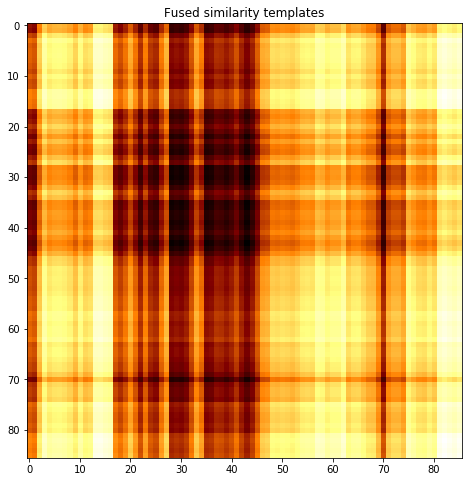

subject 30; gesture 1_1_1


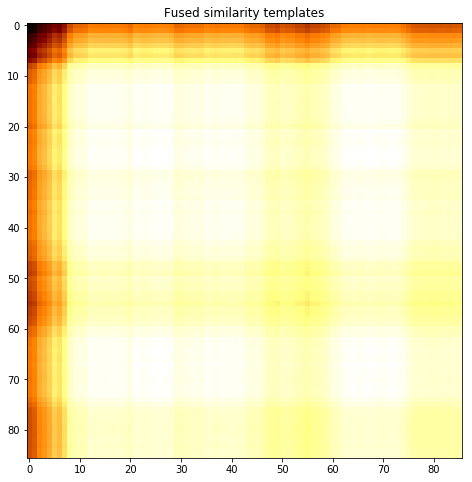

subject 30; gesture 1_0_1


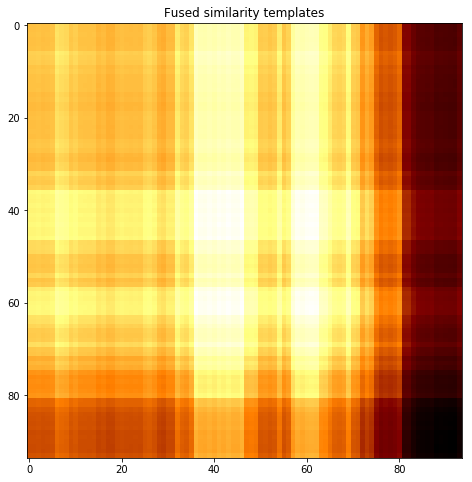

subject 30; gesture 1_0_2


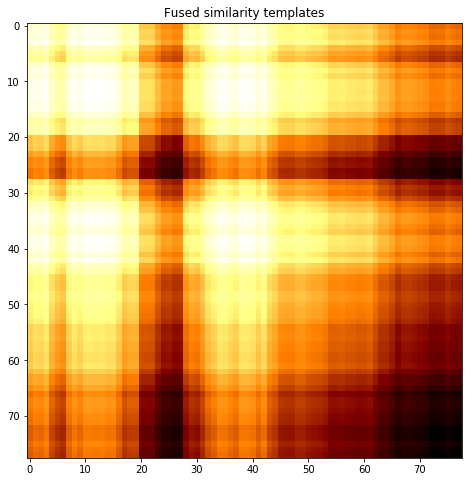

subject 06; gesture 1_1_2


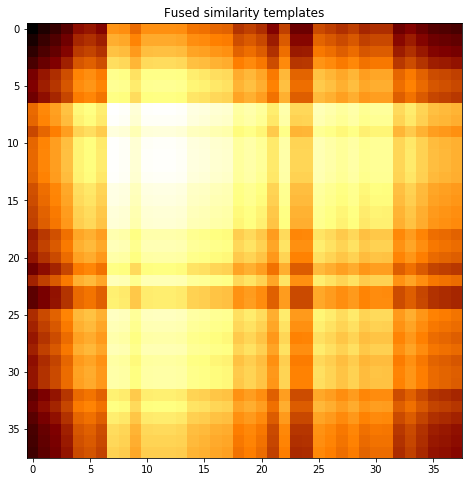

subject 06; gesture 1_1_1


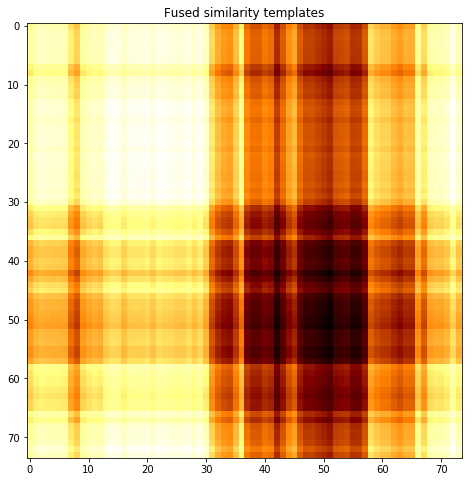

subject 06; gesture 1_0_1


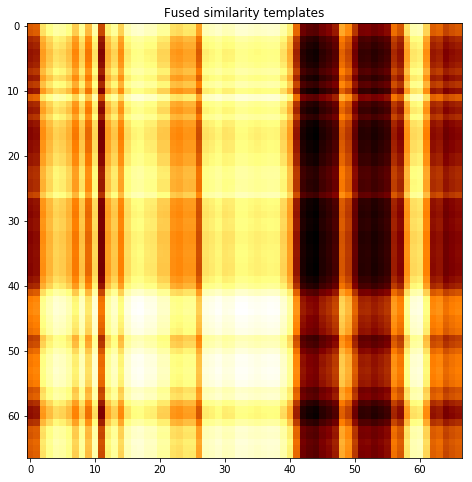

subject 06; gesture 1_0_2


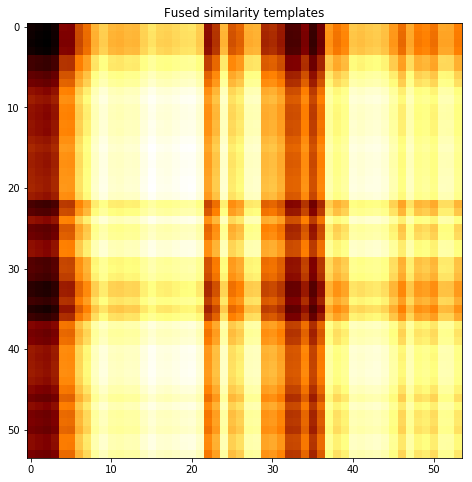

subject 09; gesture 1_1_2


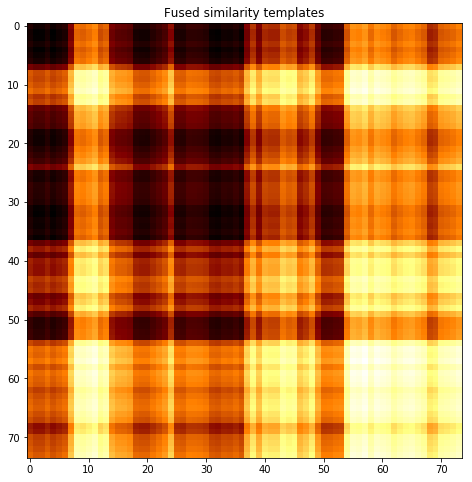

subject 09; gesture 1_1_1


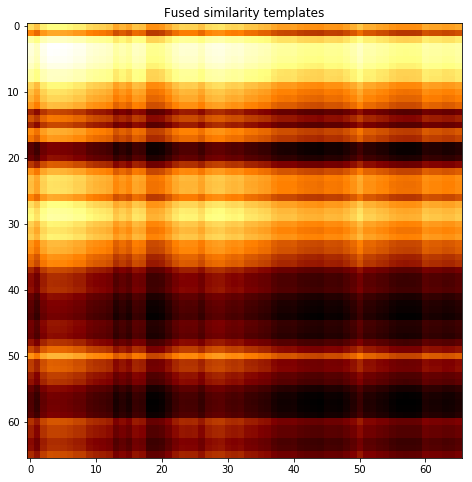

subject 09; gesture 1_0_1


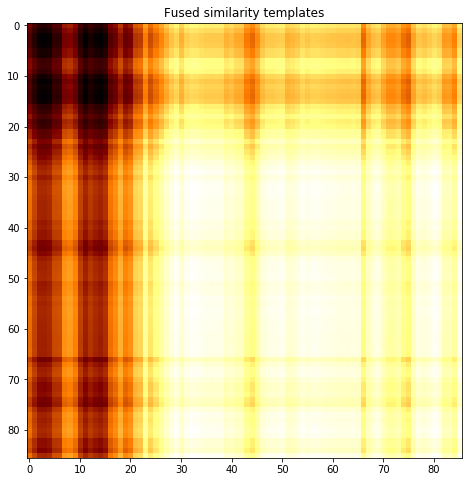

subject 09; gesture 1_0_2


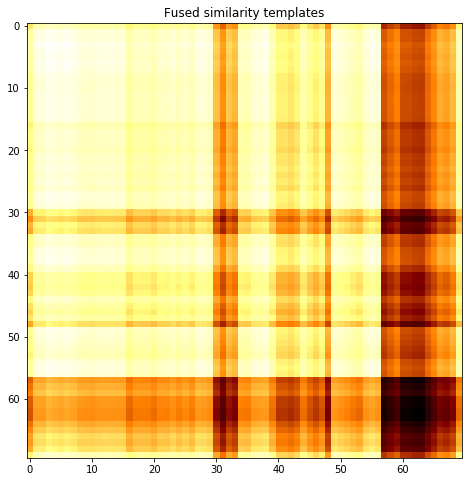

subject 03; gesture 1_1_2


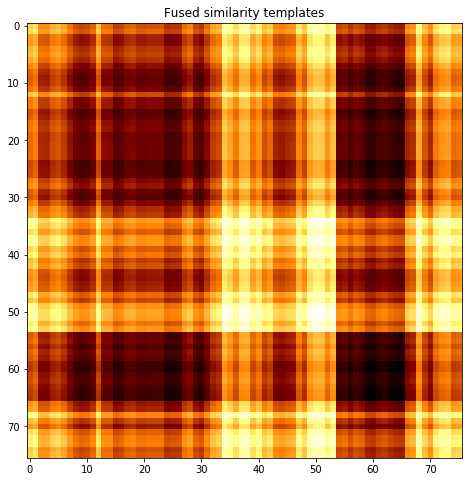

subject 03; gesture 1_1_1


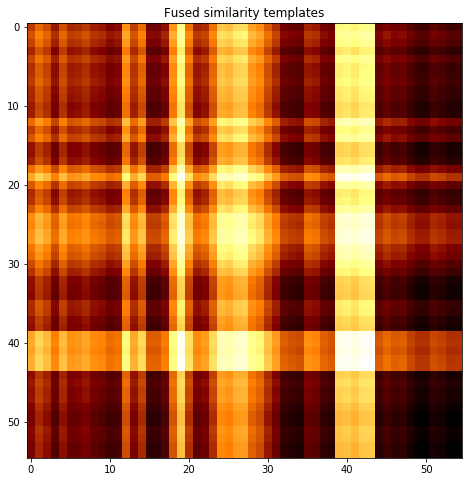

subject 03; gesture 1_0_1


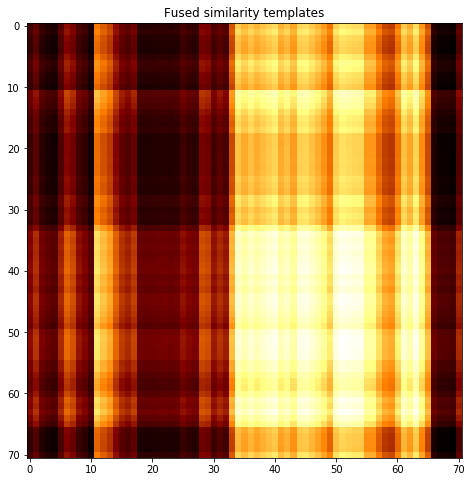

subject 03; gesture 1_0_2


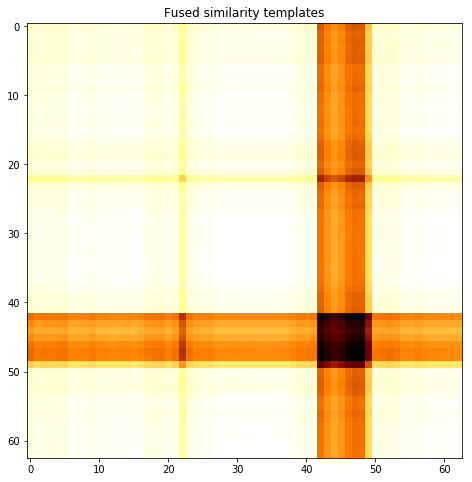

subject 05; gesture 1_1_2


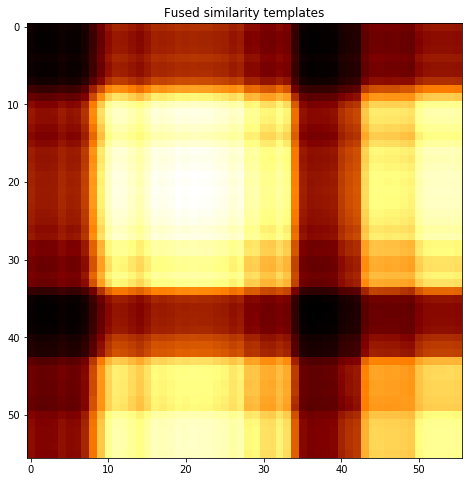

subject 05; gesture 1_1_1


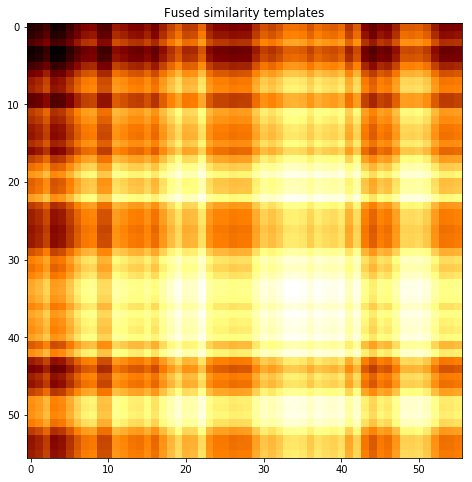

subject 05; gesture 1_0_1


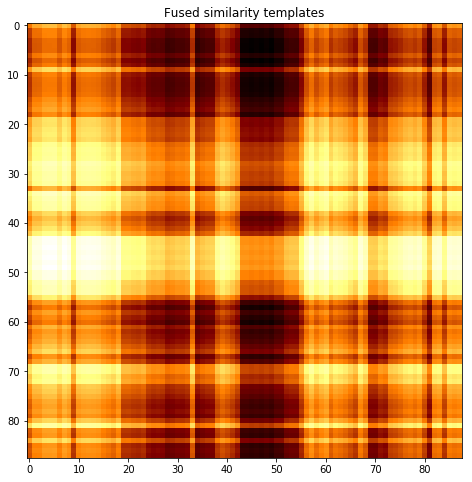

subject 05; gesture 1_0_2


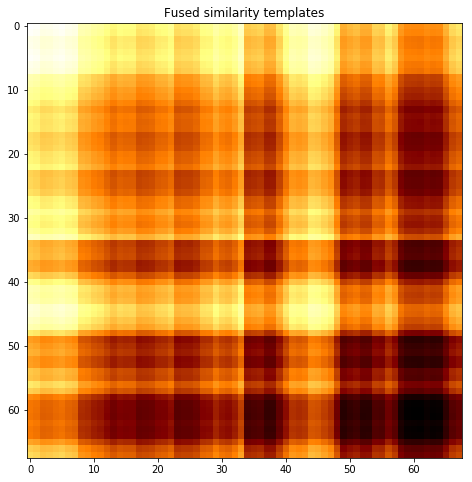

subject 21; gesture 1_1_2


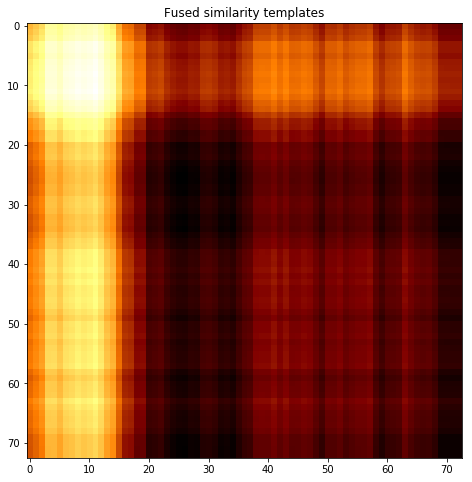

subject 21; gesture 1_1_1


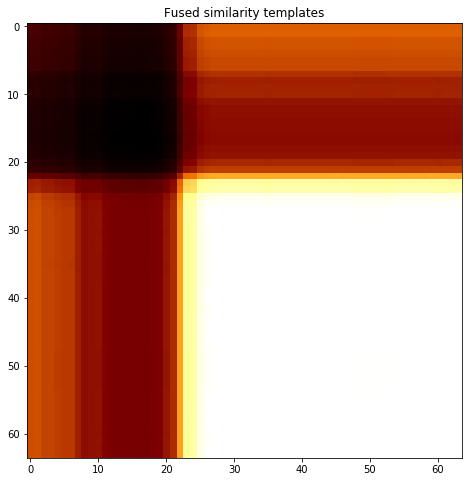

subject 21; gesture 1_0_1


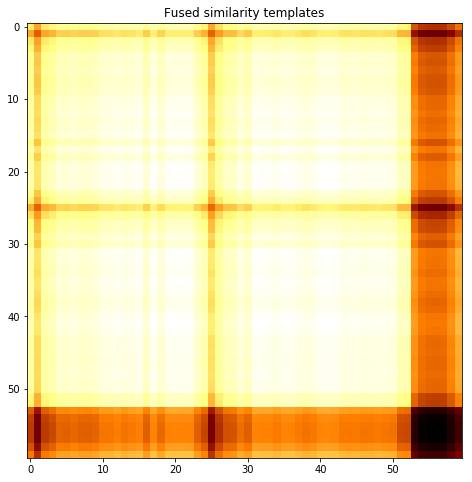

subject 21; gesture 1_0_2


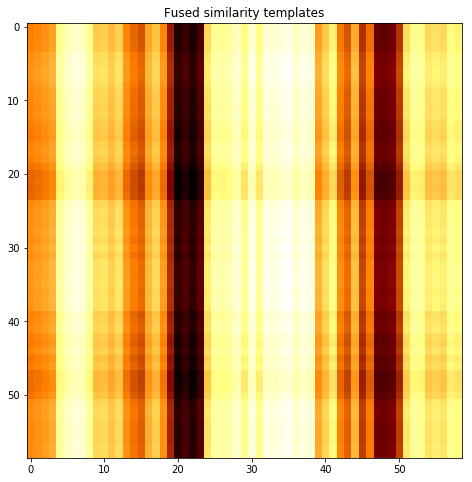

subject 17; gesture 1_1_2


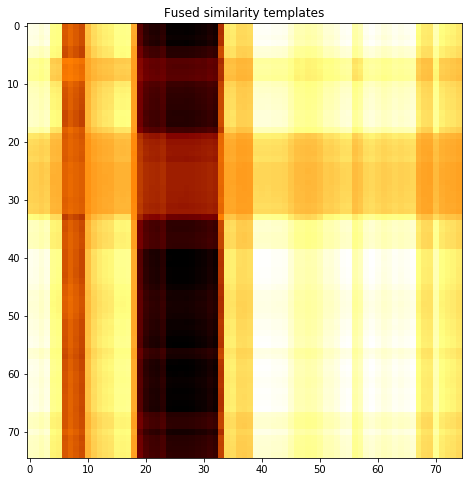

subject 17; gesture 1_1_1


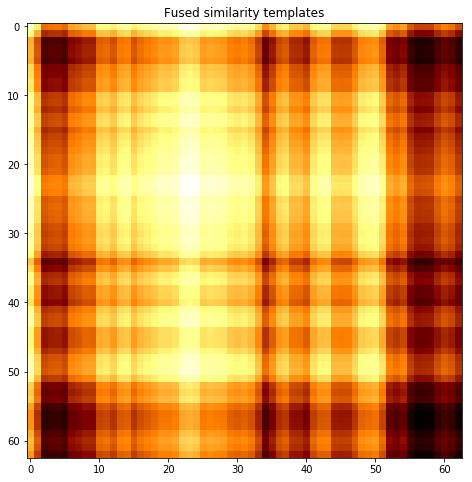

subject 17; gesture 1_0_1


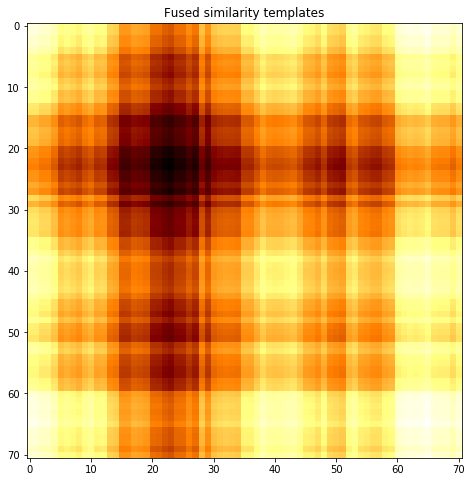

subject 17; gesture 1_0_2


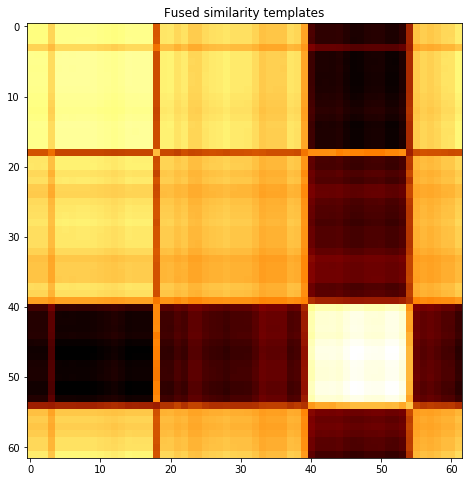

subject 01; gesture 1_1_2


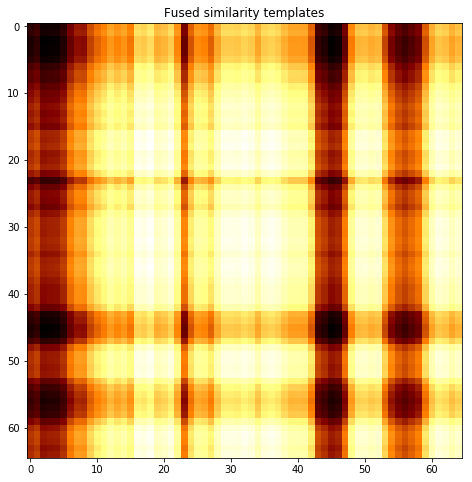

subject 01; gesture 1_1_1


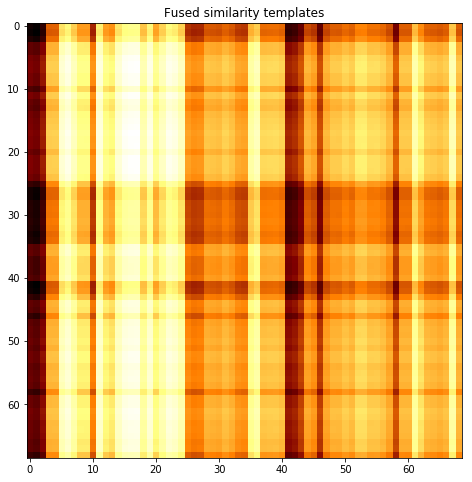

subject 01; gesture 1_0_1


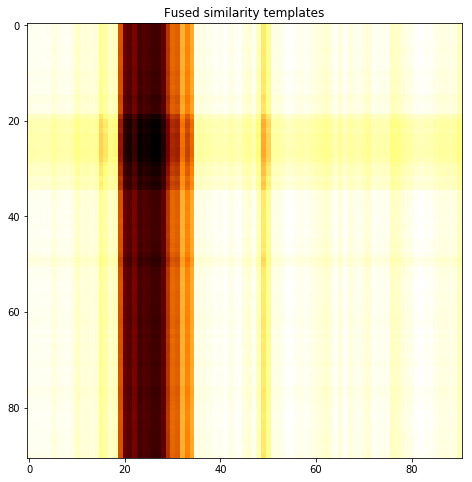

subject 01; gesture 1_0_2


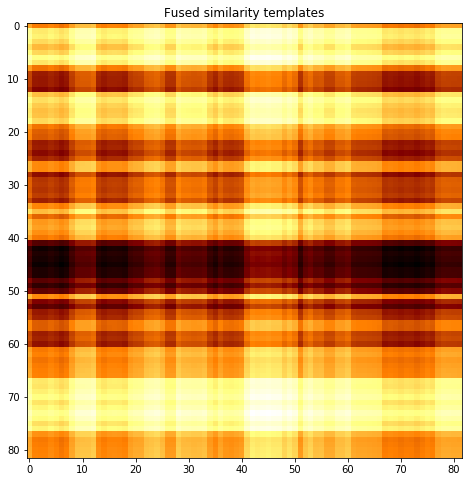

subject 16; gesture 1_1_2


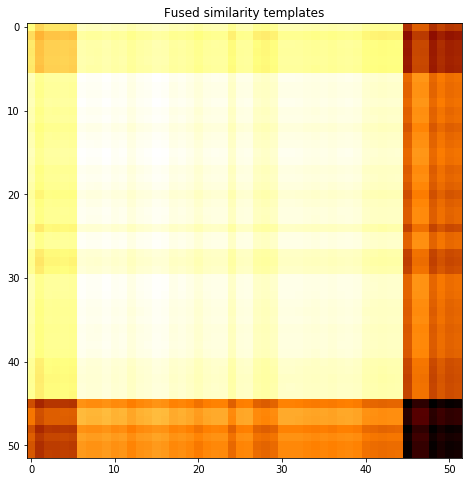

subject 16; gesture 1_1_1


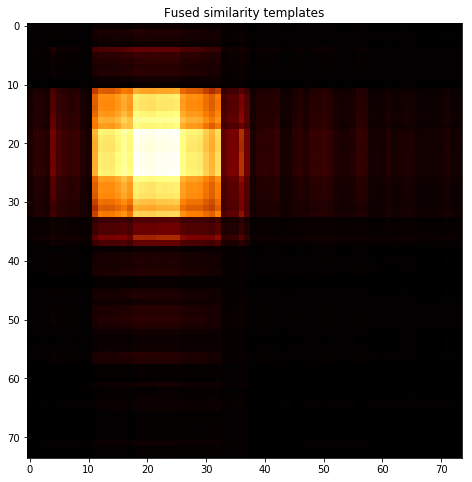

subject 16; gesture 1_0_1


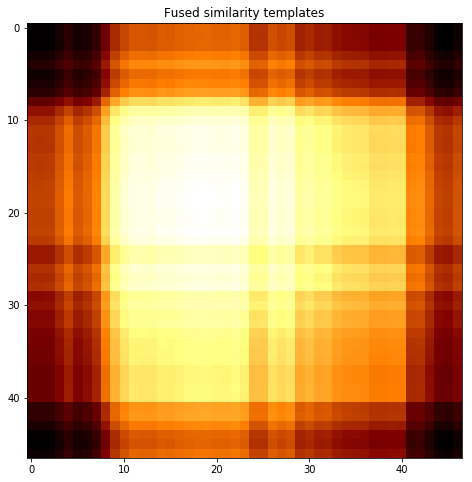

subject 16; gesture 1_0_2


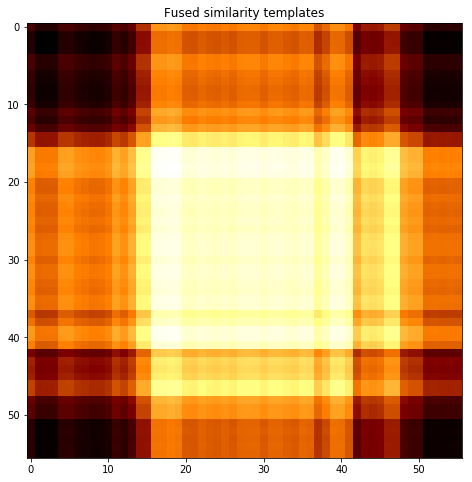

subject 26; gesture 1_1_2


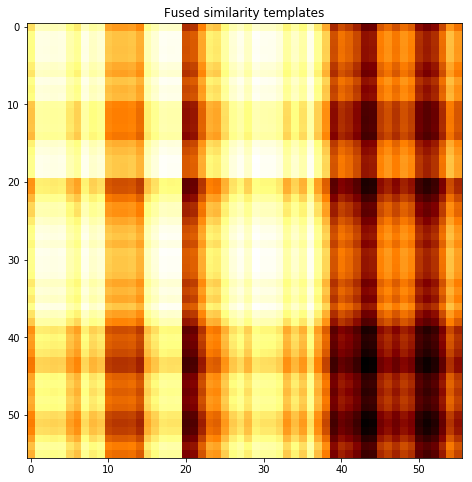

subject 26; gesture 1_1_1


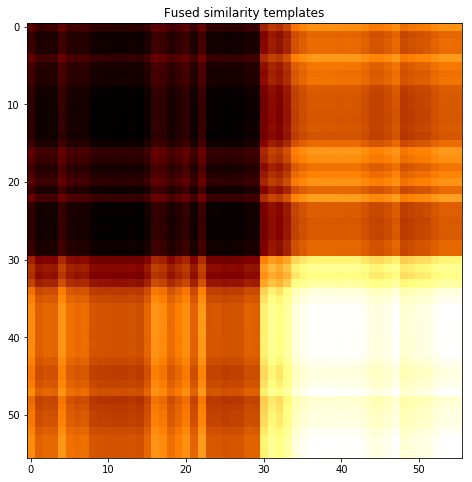

subject 26; gesture 1_0_1


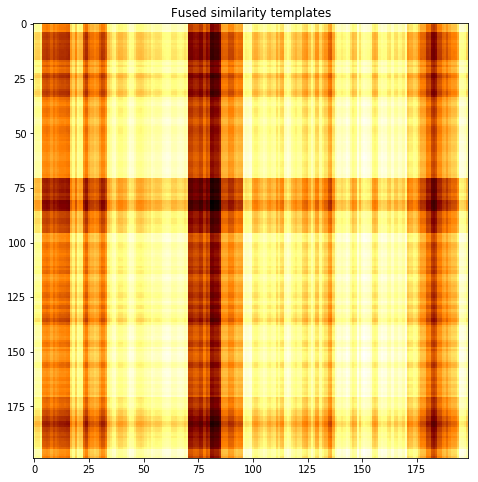

subject 26; gesture 1_0_2


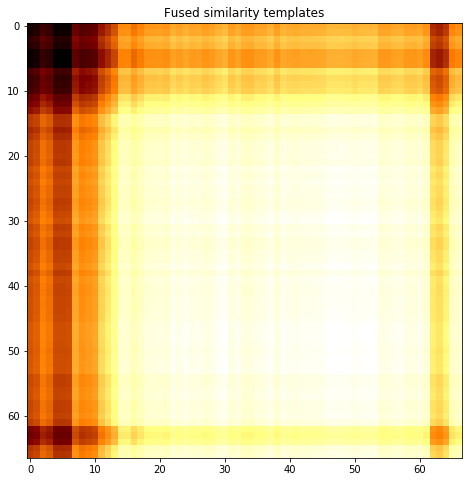

subject 32; gesture 1_1_2


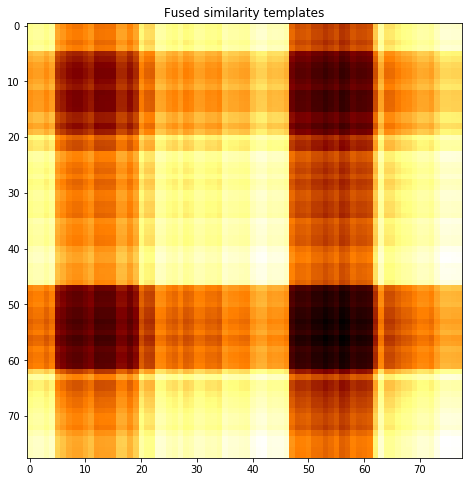

subject 32; gesture 1_1_1


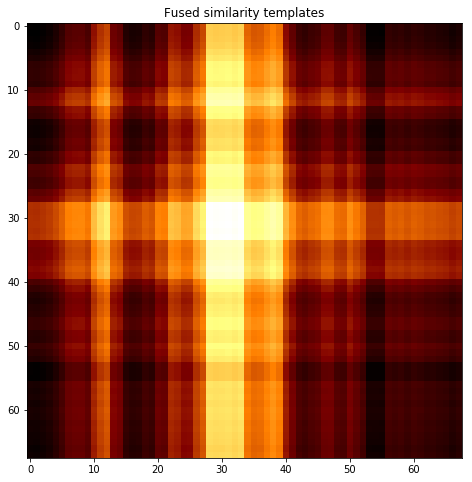

subject 32; gesture 1_0_1


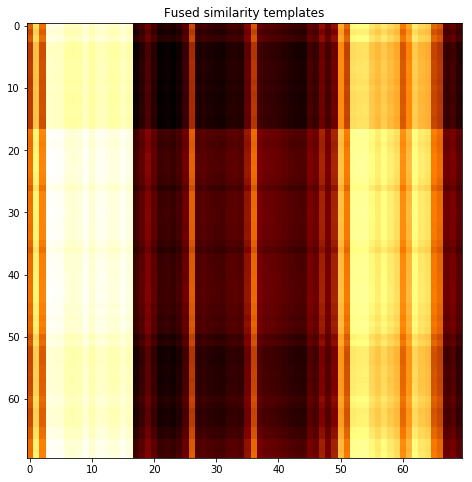

subject 32; gesture 1_0_2


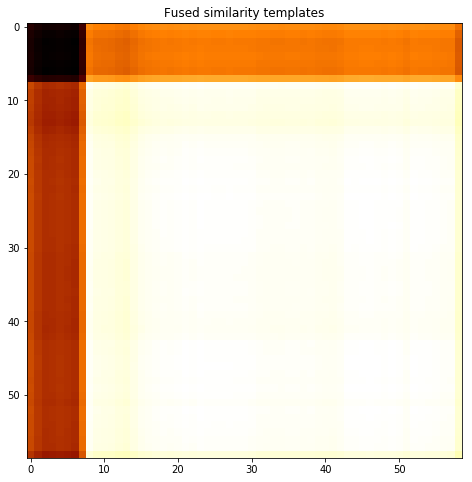

subject 04; gesture 1_1_2


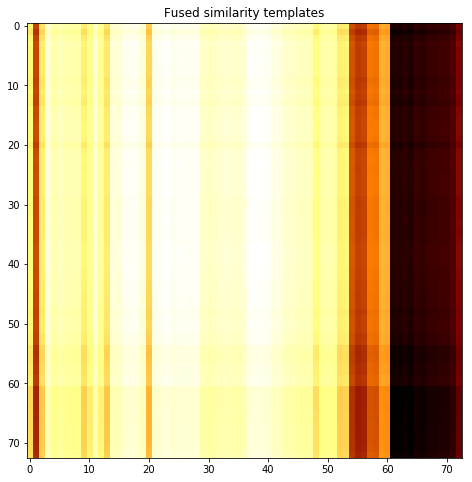

subject 04; gesture 1_1_1


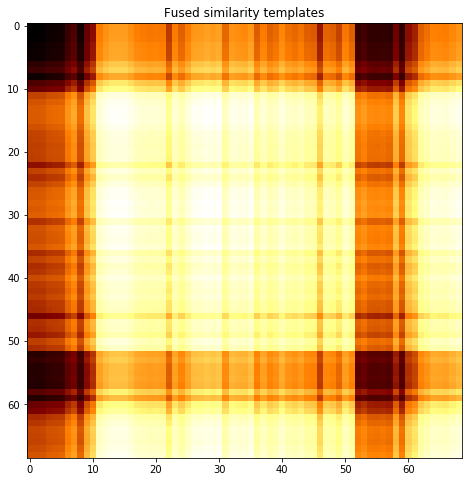

subject 04; gesture 1_0_1


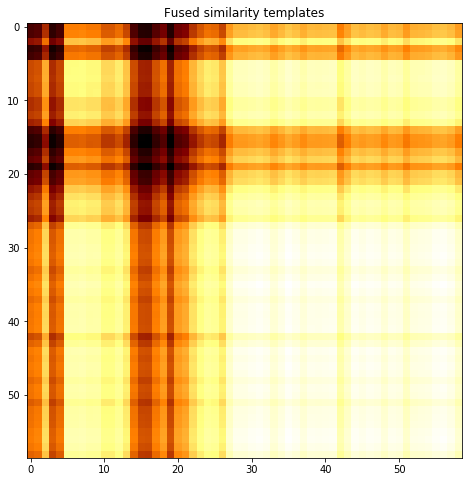

subject 04; gesture 1_0_2


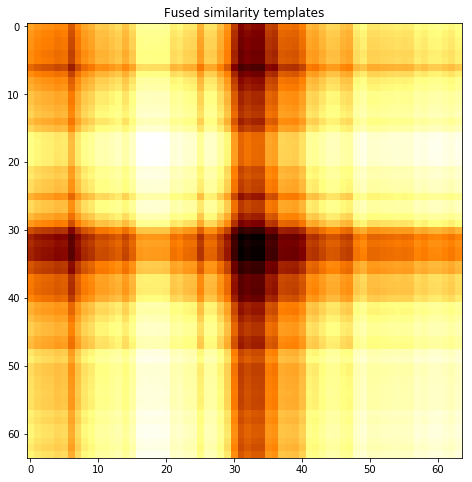

subject 08; gesture 1_1_2


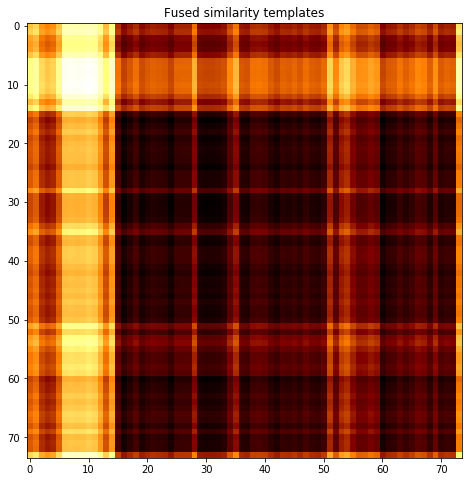

subject 08; gesture 1_1_1


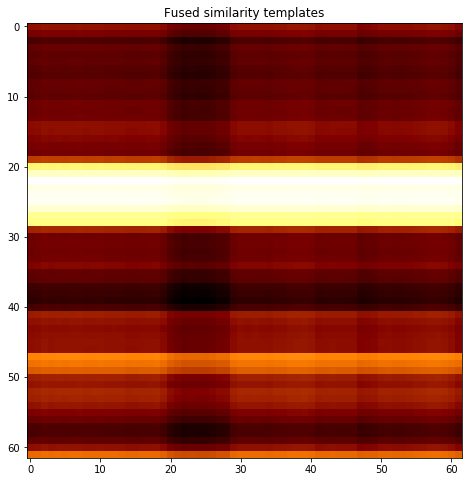

subject 08; gesture 1_0_1


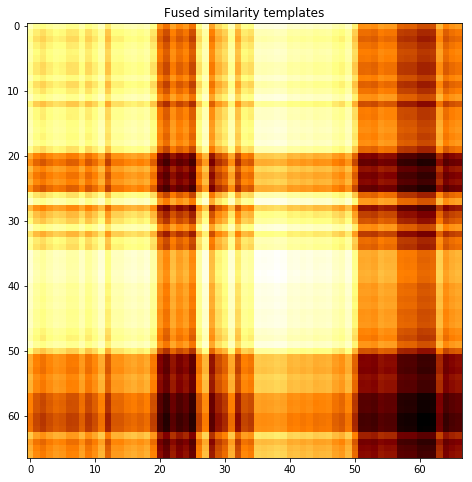

subject 08; gesture 1_0_2


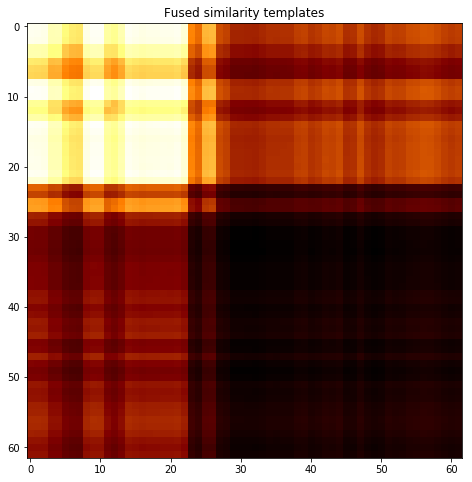

subject 27; gesture 1_1_2


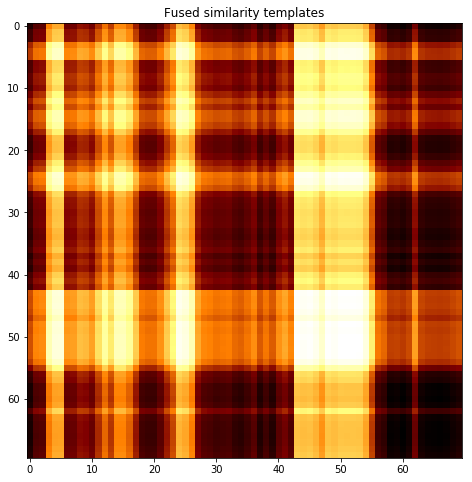

subject 27; gesture 1_1_1


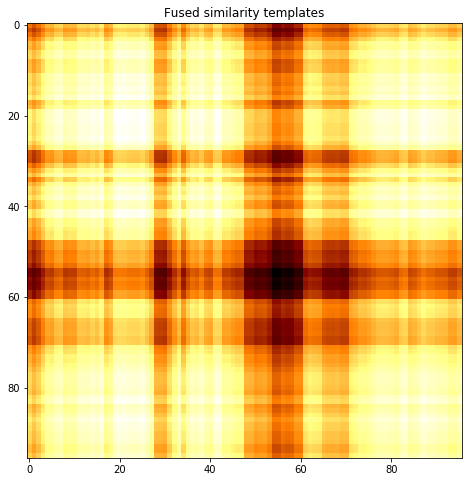

subject 27; gesture 1_0_1


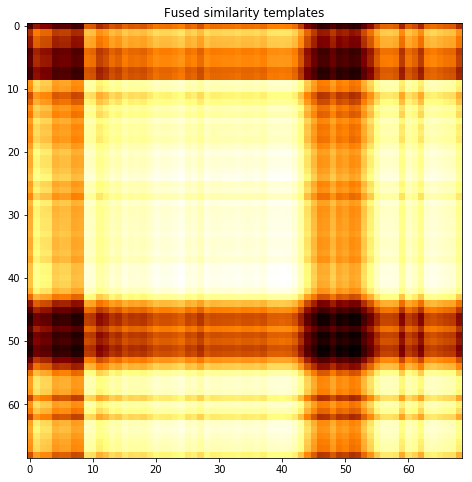

subject 27; gesture 1_0_2


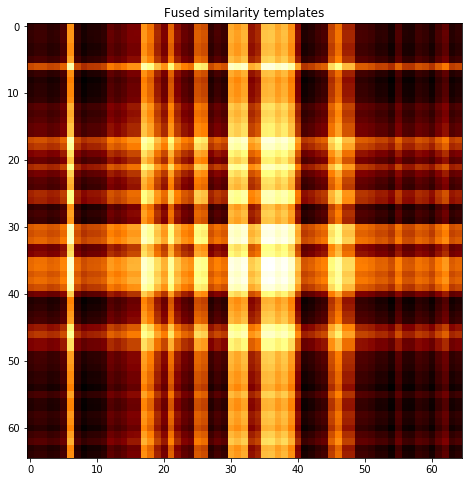

subject 14; gesture 1_1_2


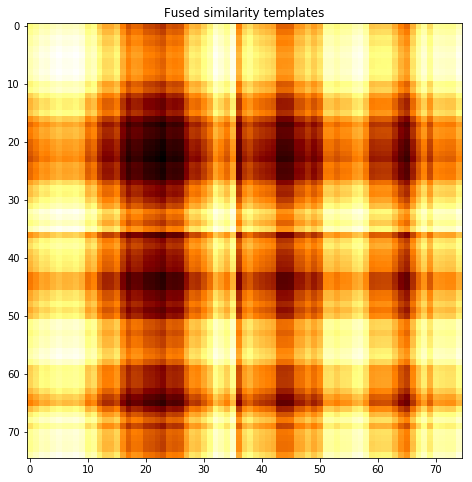

subject 14; gesture 1_1_1


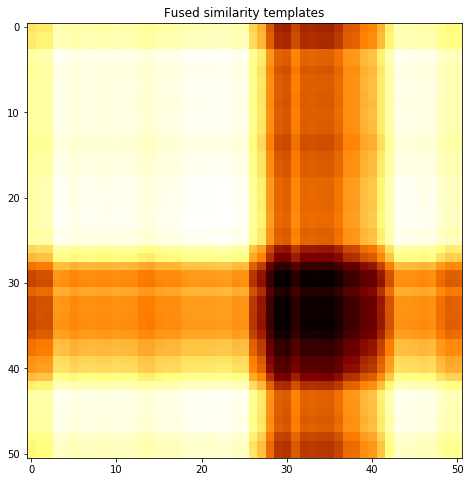

subject 14; gesture 1_0_1


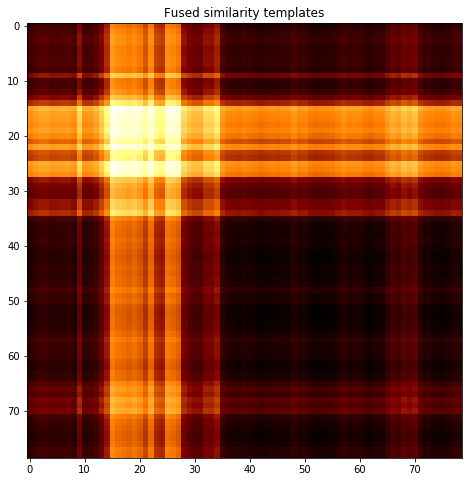

subject 14; gesture 1_0_2


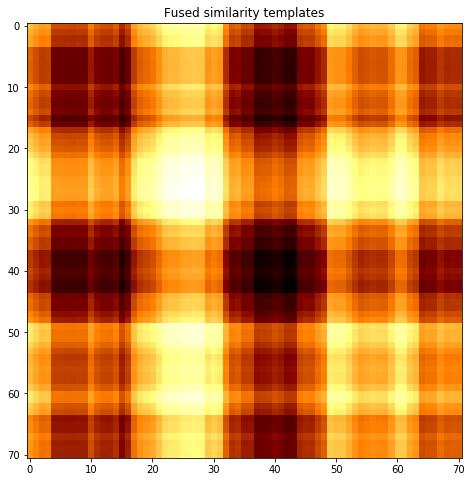

subject 23; gesture 1_1_2


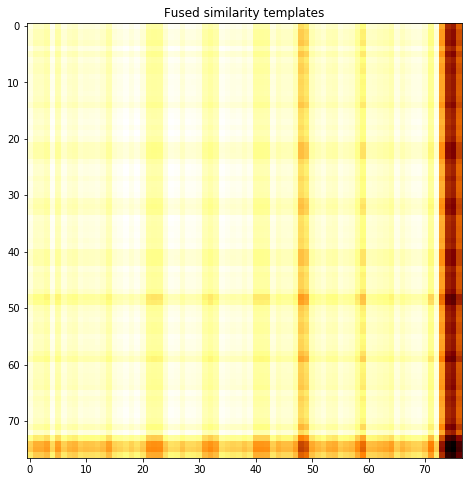

subject 23; gesture 1_1_1


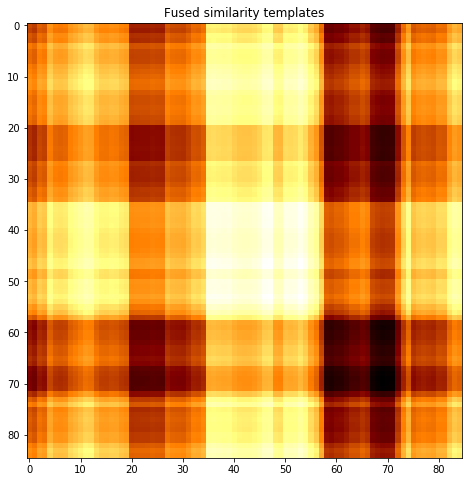

subject 23; gesture 1_0_1


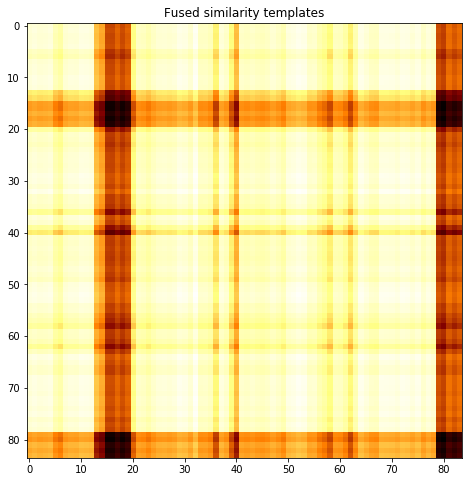

subject 23; gesture 1_0_2


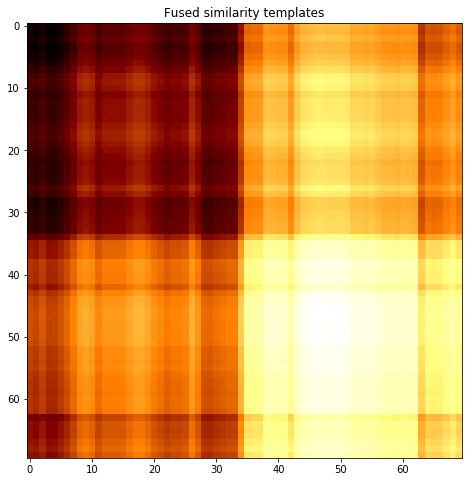

subject 25; gesture 1_1_2


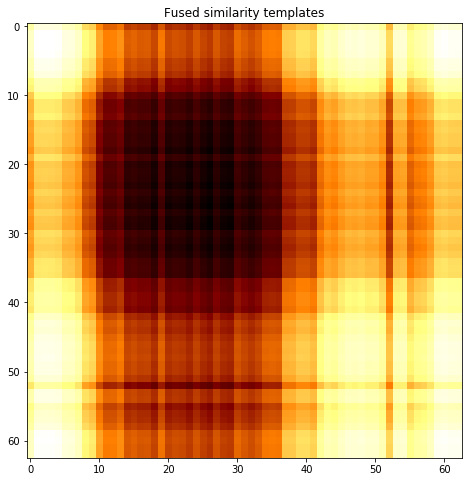

subject 25; gesture 1_1_1


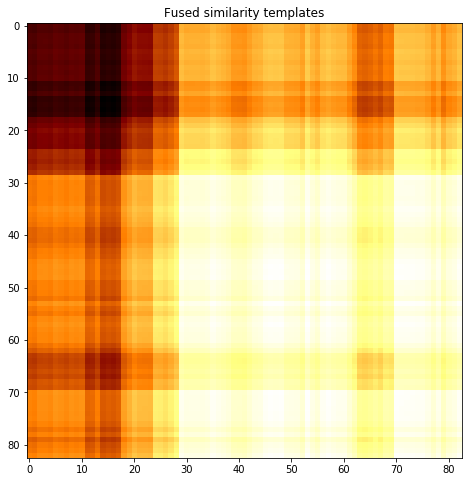

subject 25; gesture 1_0_1


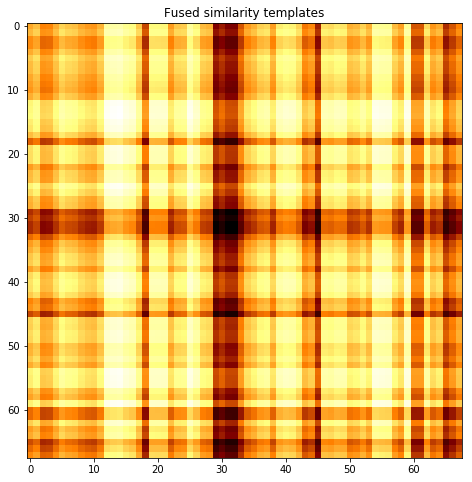

subject 25; gesture 1_0_2


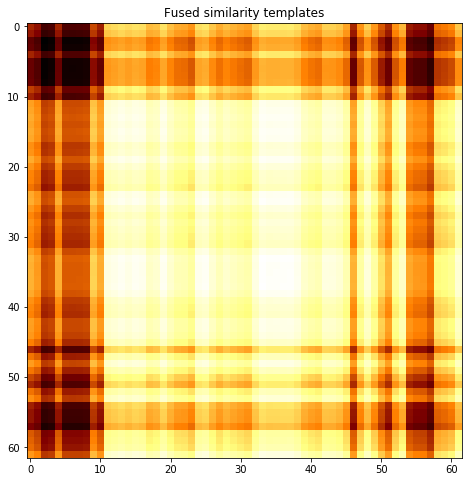

subject 18; gesture 1_1_2


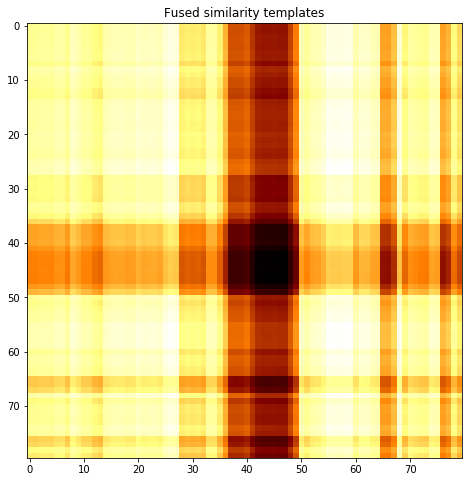

subject 18; gesture 1_1_1


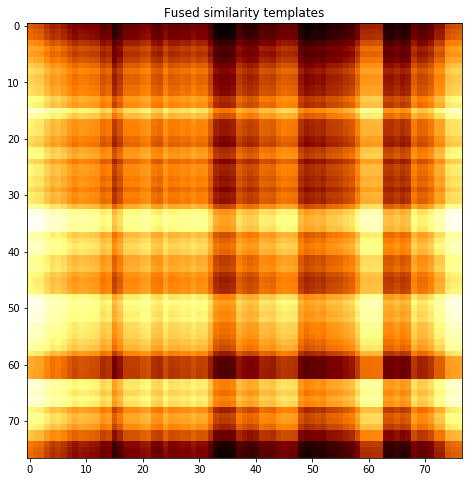

subject 18; gesture 1_0_1


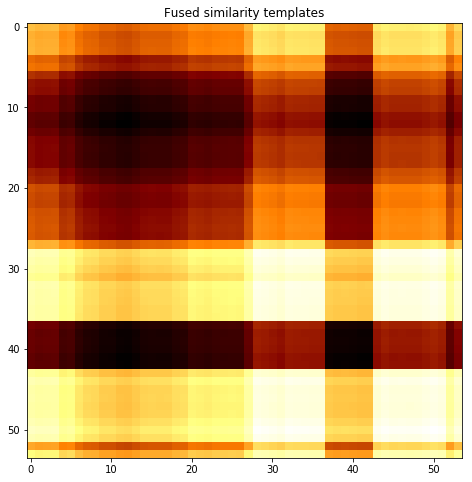

subject 18; gesture 1_0_2


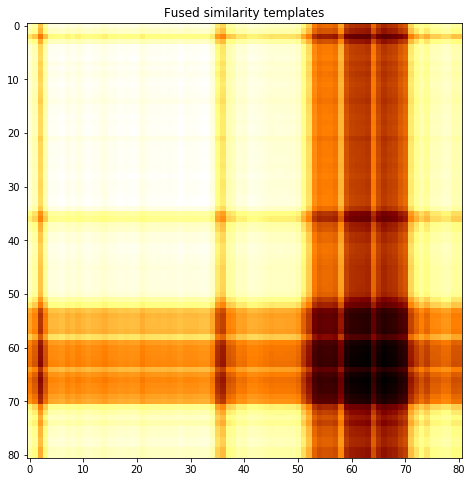

subject 29; gesture 1_1_2


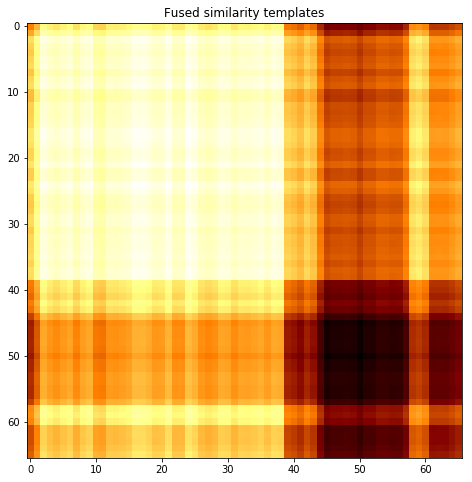

subject 29; gesture 1_1_1


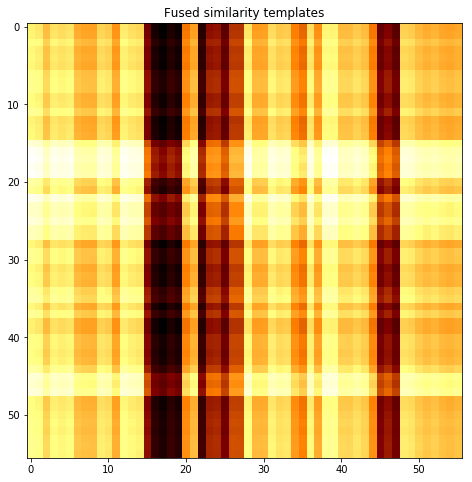

subject 29; gesture 1_0_1


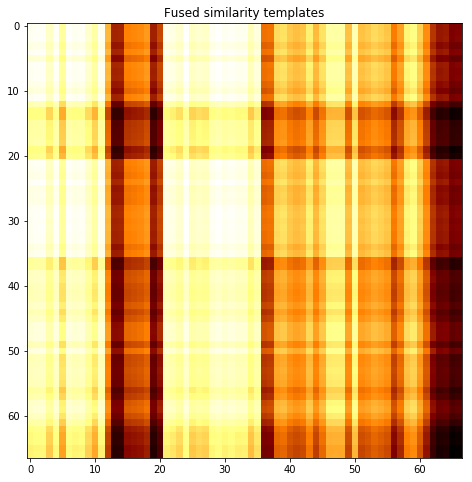

subject 29; gesture 1_0_2


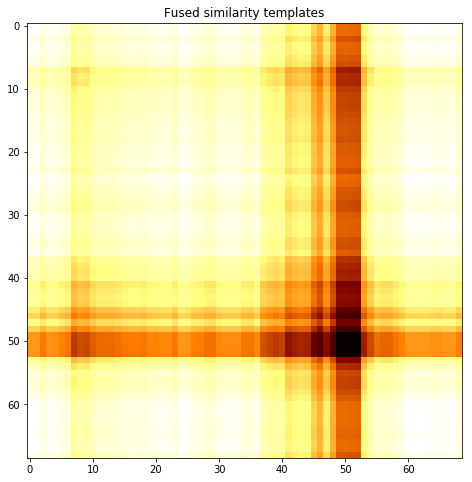

subject 15; gesture 1_1_2


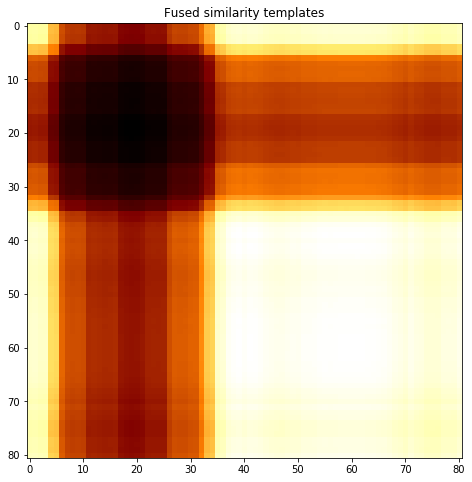

subject 15; gesture 1_1_1


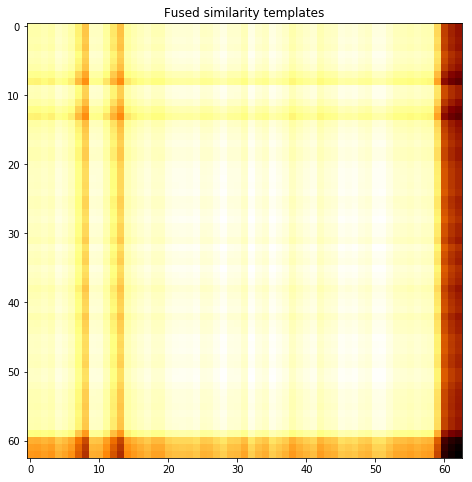

subject 15; gesture 1_0_1


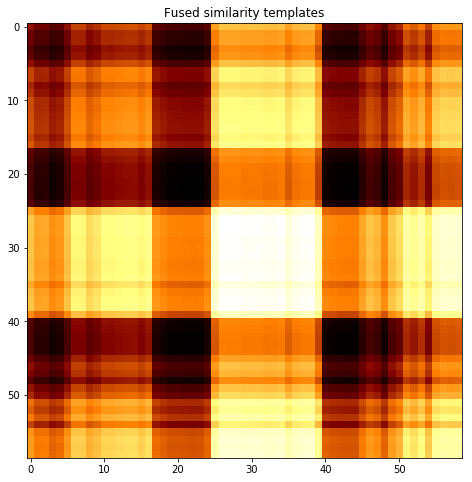

subject 15; gesture 1_0_2


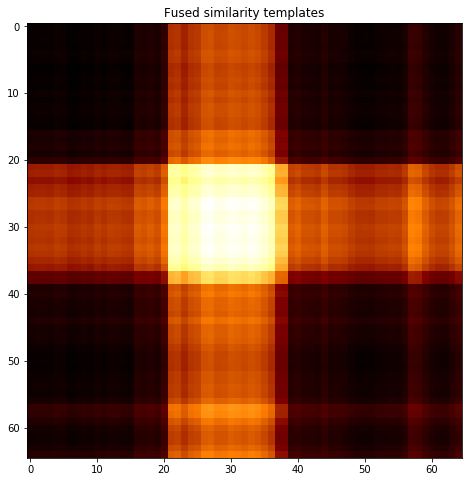

subject 28; gesture 1_1_2


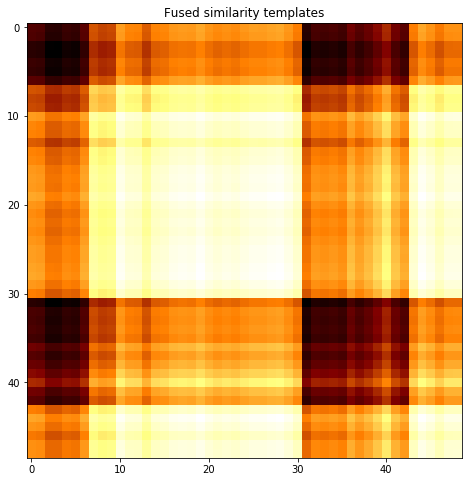

subject 28; gesture 1_1_1


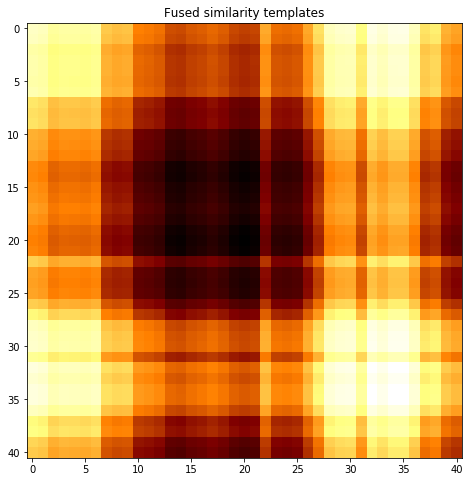

subject 28; gesture 1_0_1


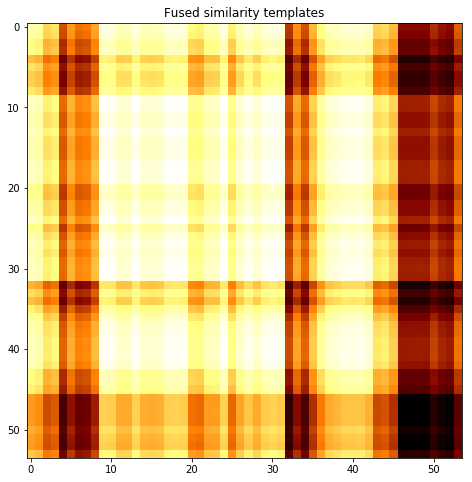

subject 28; gesture 1_0_2


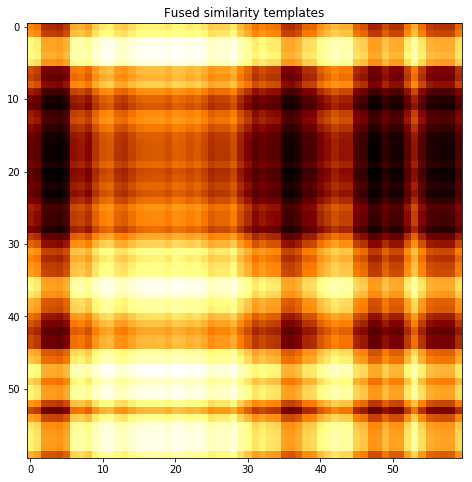

subject 12; gesture 1_1_2


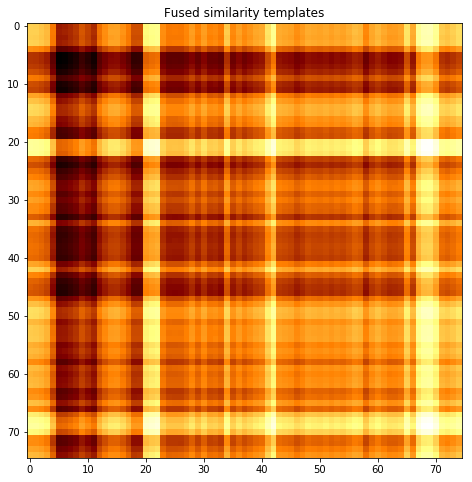

subject 12; gesture 1_1_1


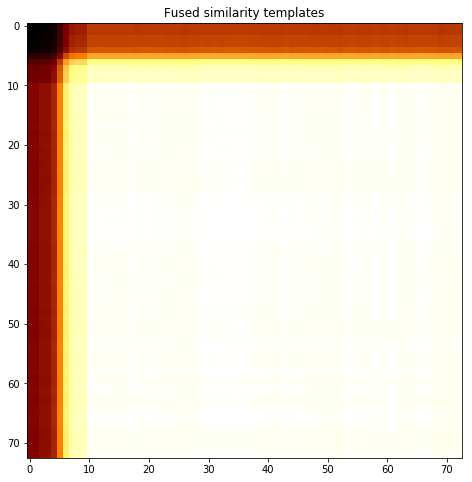

subject 12; gesture 1_0_1


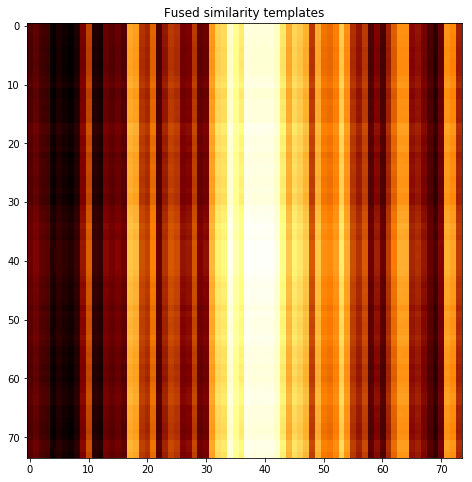

subject 12; gesture 1_0_2


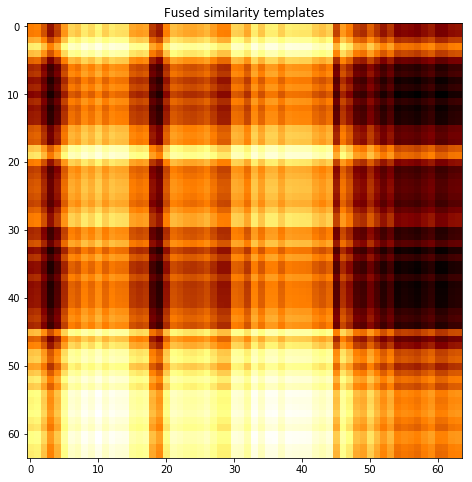

subject 19; gesture 1_1_2


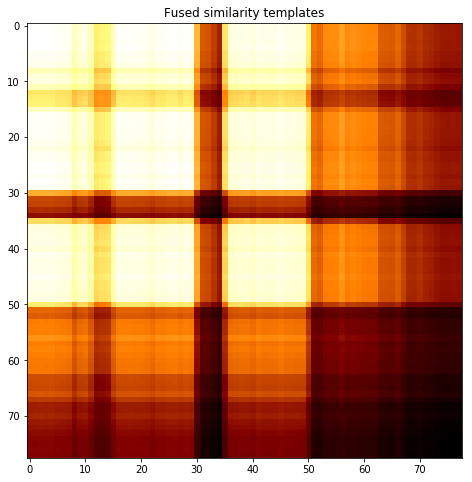

subject 19; gesture 1_1_1


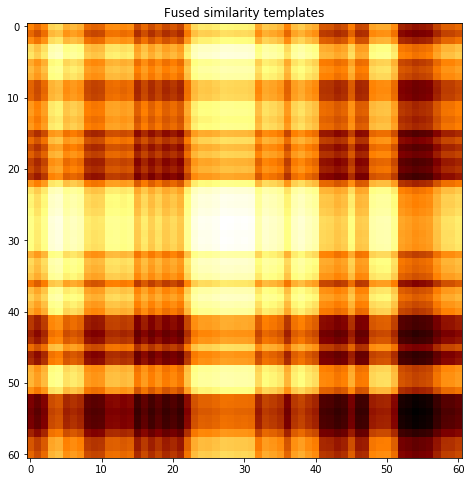

subject 19; gesture 1_0_1


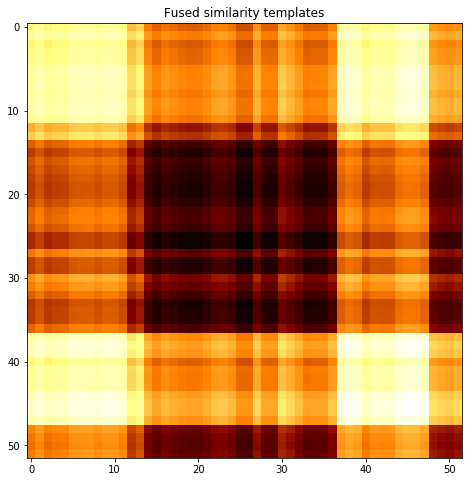

subject 19; gesture 1_0_2


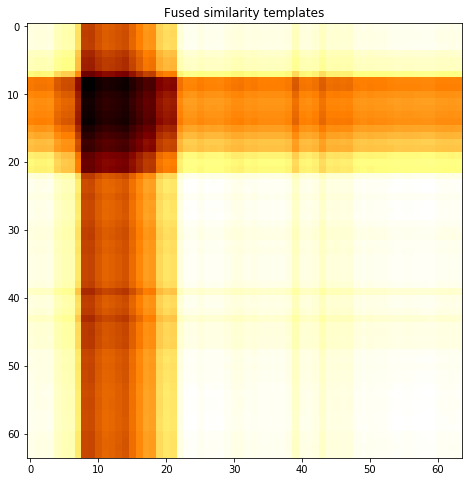

subject 07; gesture 1_1_2


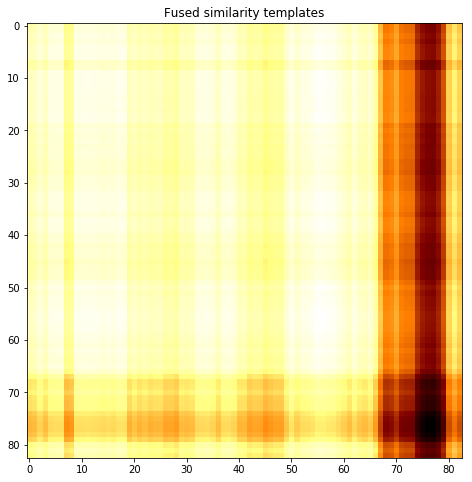

subject 07; gesture 1_1_1


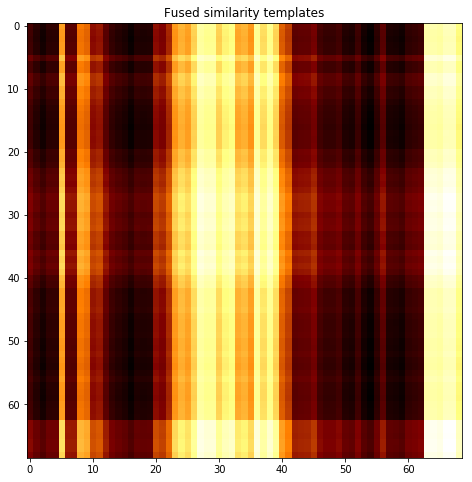

subject 07; gesture 1_0_1


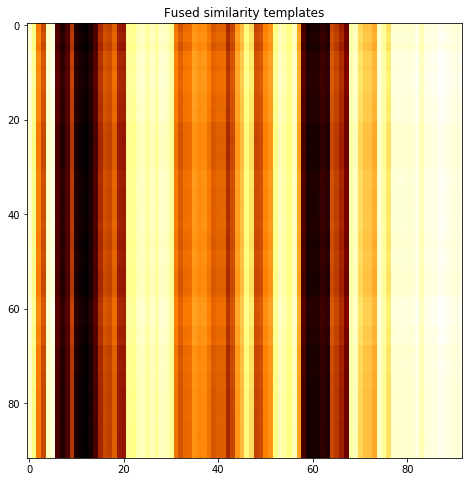

subject 07; gesture 1_0_2


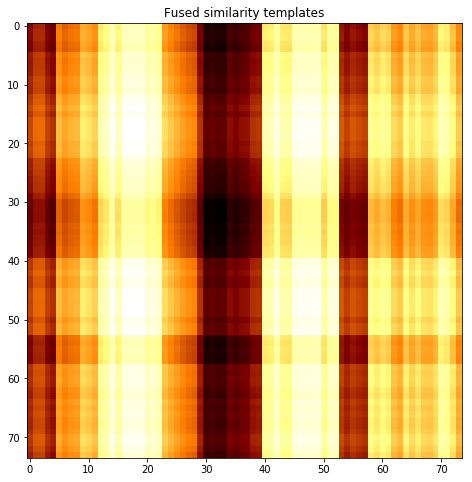

subject 20; gesture 1_1_2


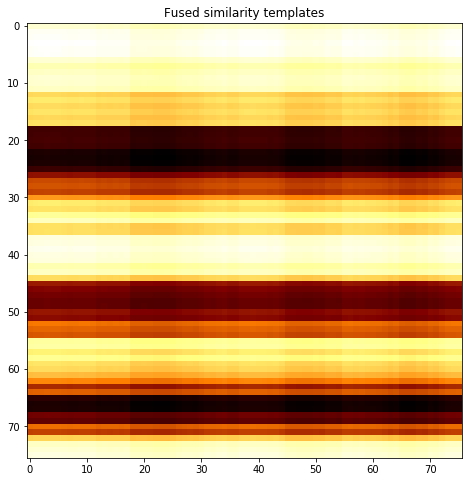

subject 20; gesture 1_1_1


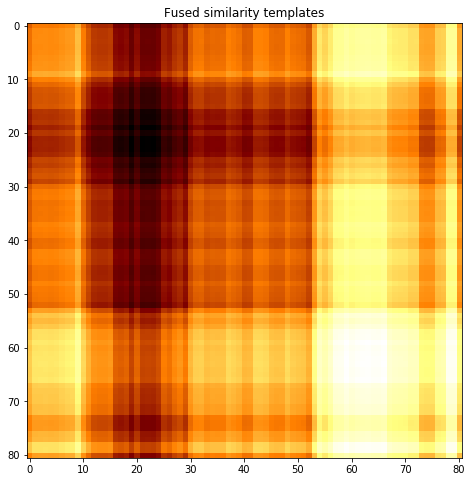

subject 20; gesture 1_0_1


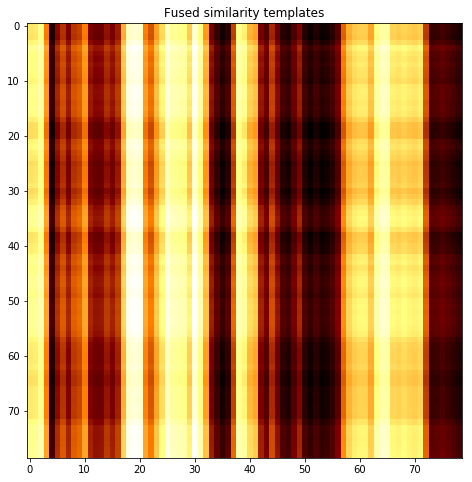

subject 20; gesture 1_0_2


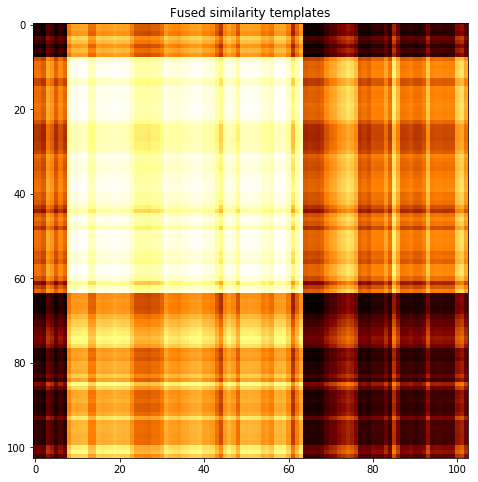

subject 31; gesture 1_1_2


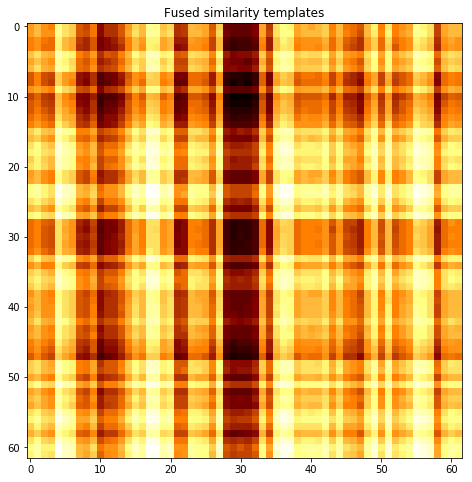

subject 31; gesture 1_1_1


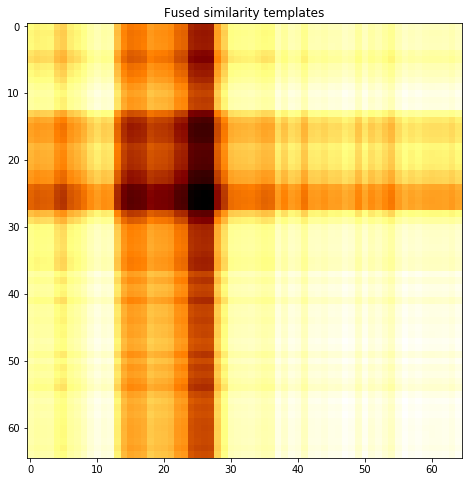

subject 31; gesture 1_0_1


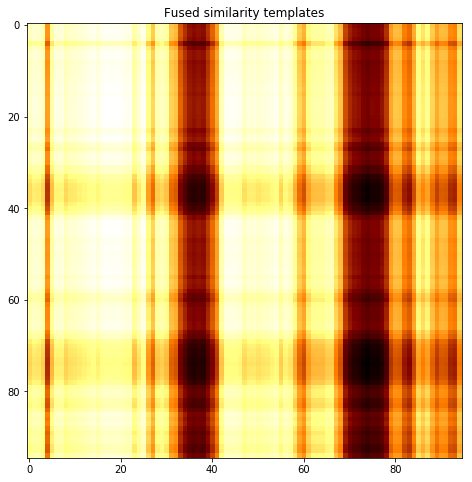

subject 31; gesture 1_0_2


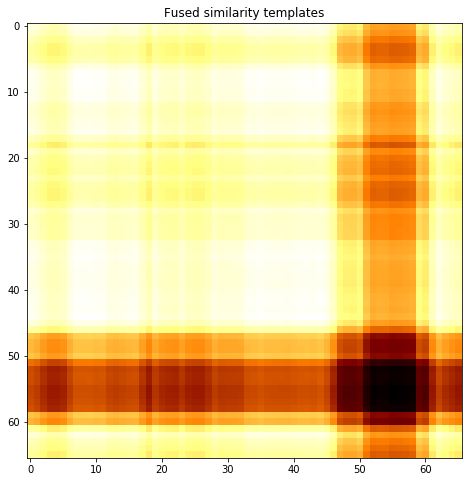

subject 13; gesture 1_1_2


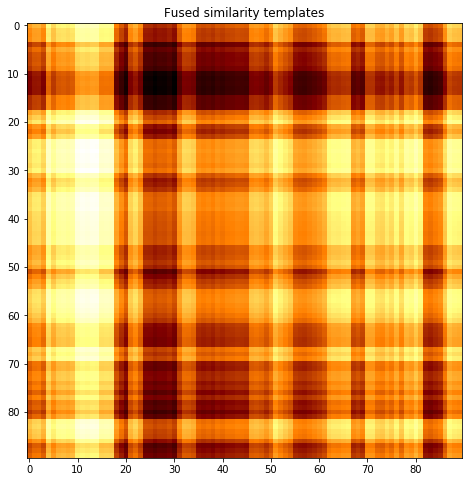

subject 13; gesture 1_1_1


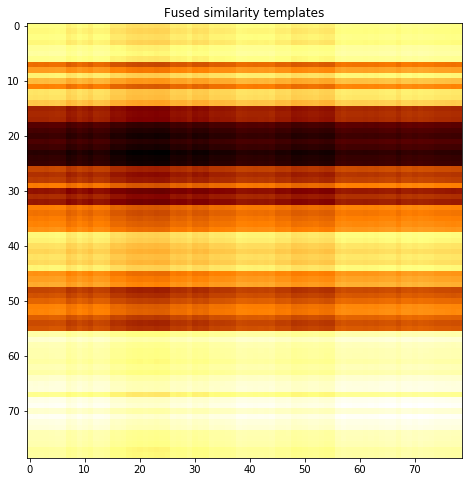

subject 13; gesture 1_0_1


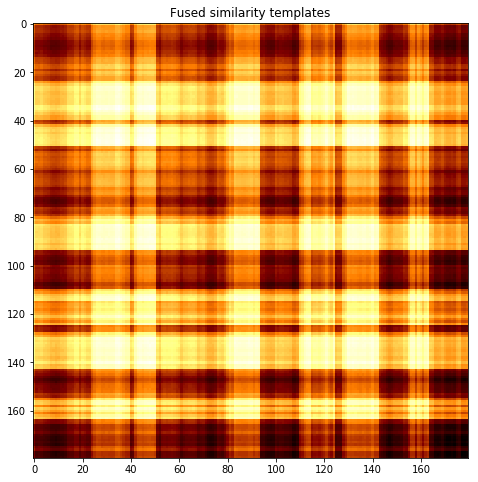

subject 13; gesture 1_0_2


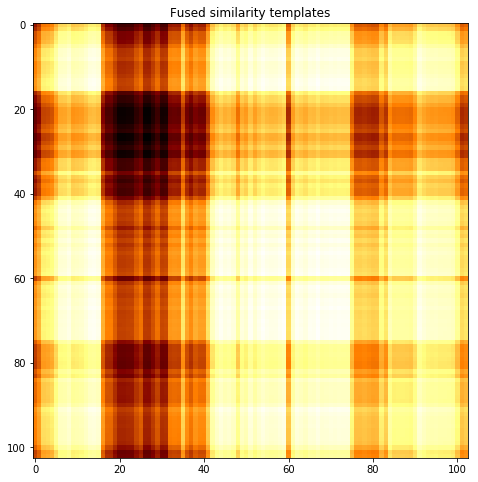

subject 36; gesture 1_1_2


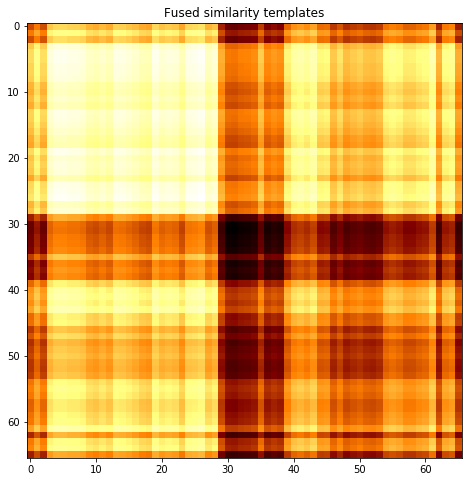

subject 36; gesture 1_1_1


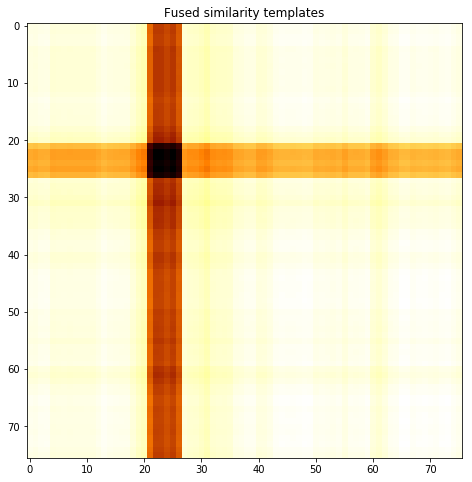

subject 36; gesture 1_0_1


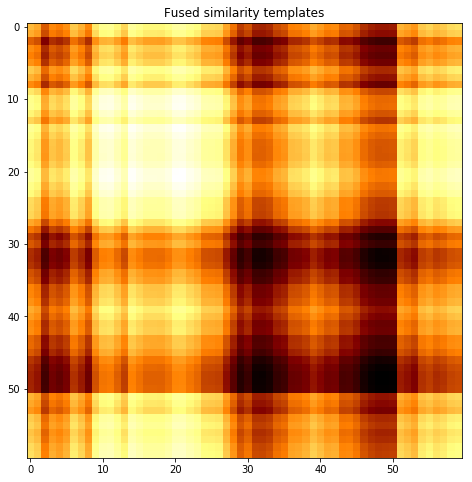

subject 36; gesture 1_0_2


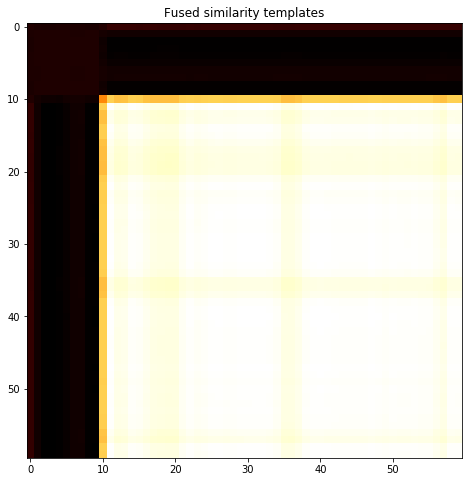

subject 24; gesture 1_1_2


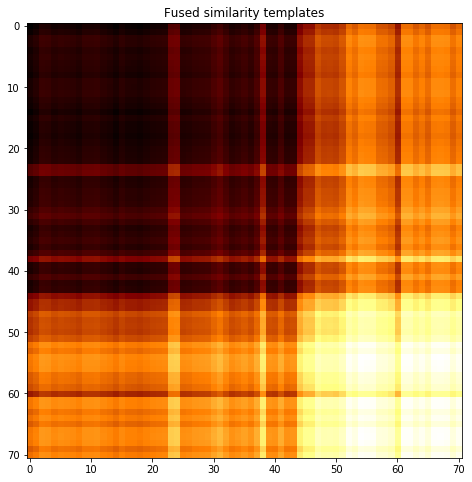

subject 24; gesture 1_1_1


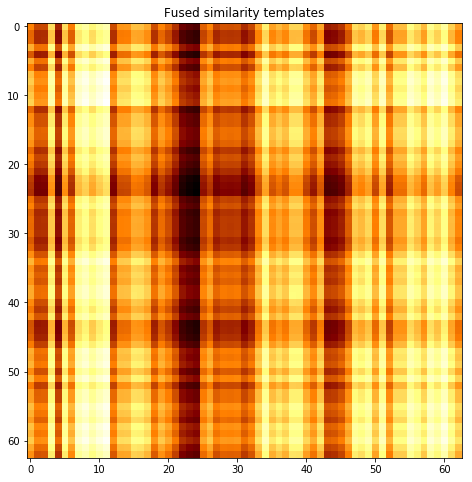

subject 24; gesture 1_0_1


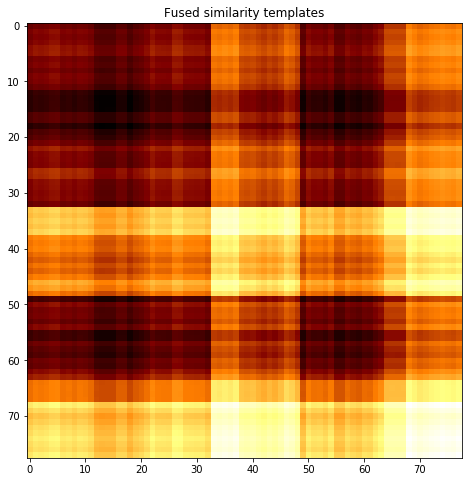

subject 24; gesture 1_0_2


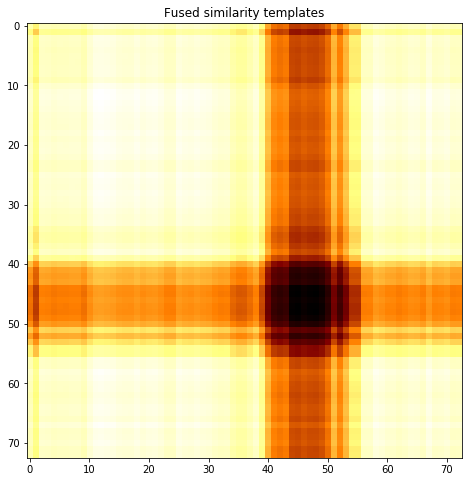

subject 33; gesture 1_1_2


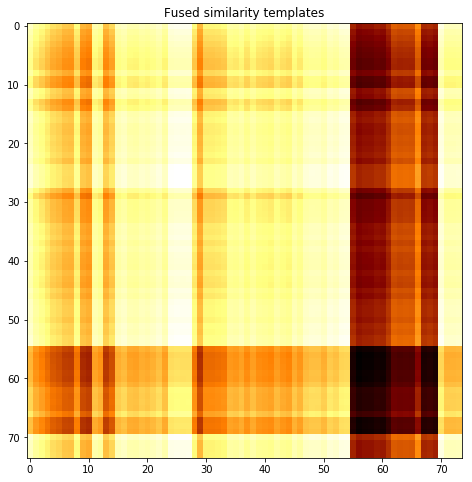

subject 33; gesture 1_1_1


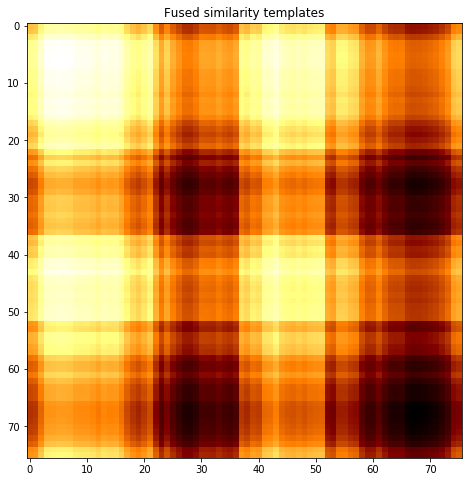

subject 33; gesture 1_0_1


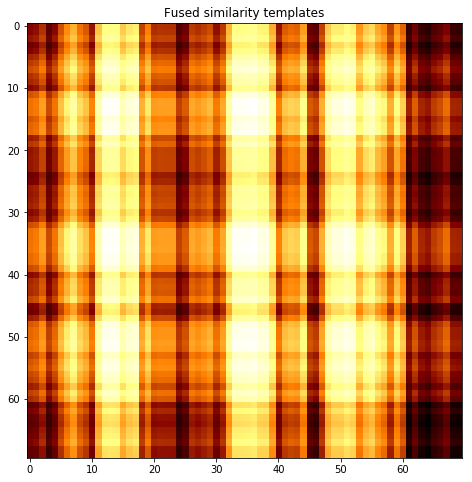

subject 33; gesture 1_0_2


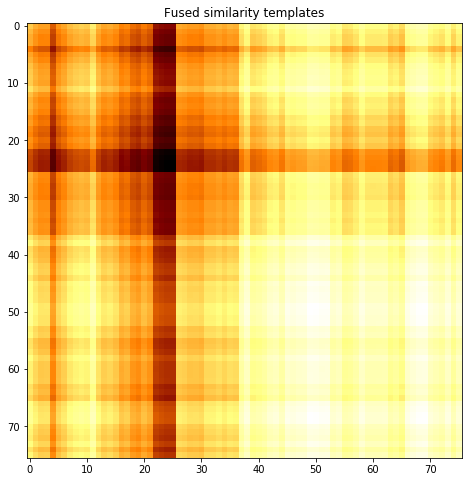

subject 11; gesture 1_1_2


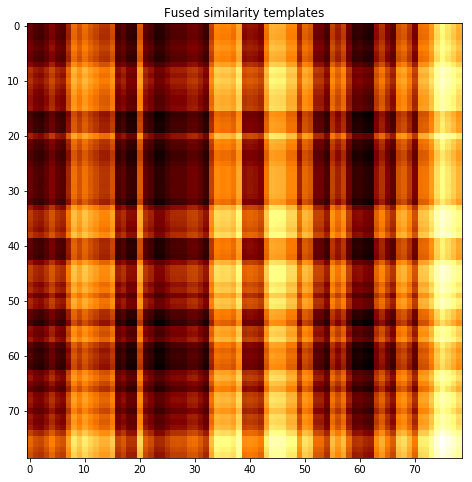

subject 11; gesture 1_1_1


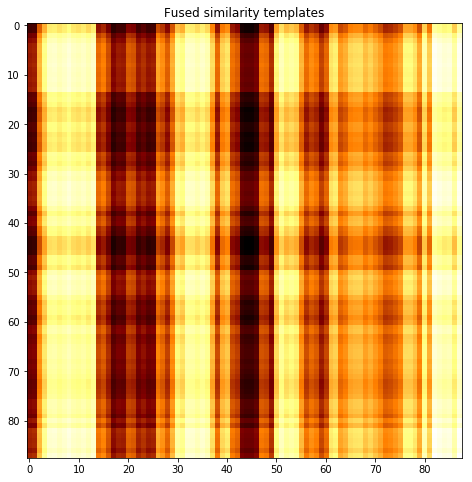

subject 11; gesture 1_0_1


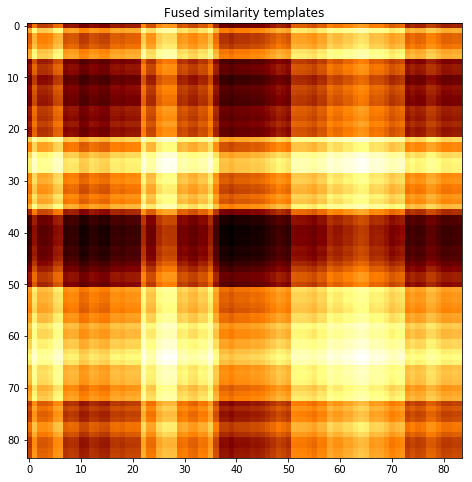

subject 11; gesture 1_0_2


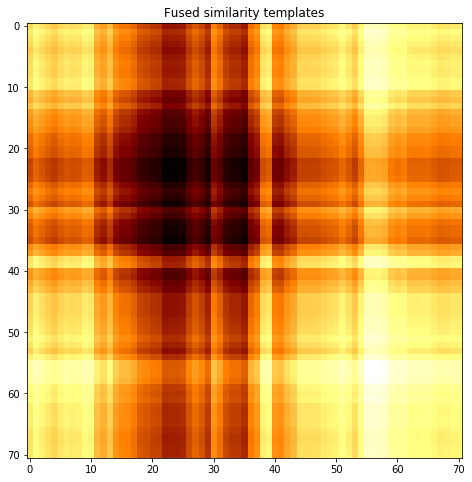

subject 35; gesture 1_1_2


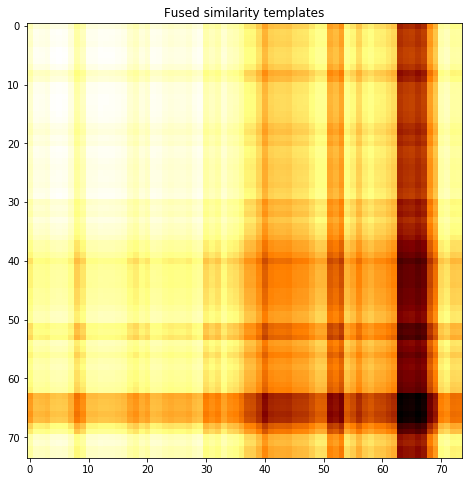

subject 35; gesture 1_1_1


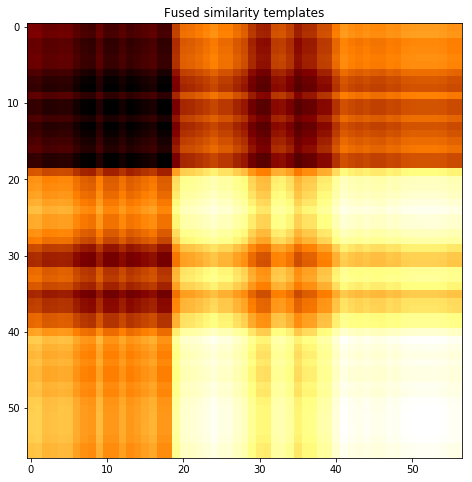

subject 35; gesture 1_0_1


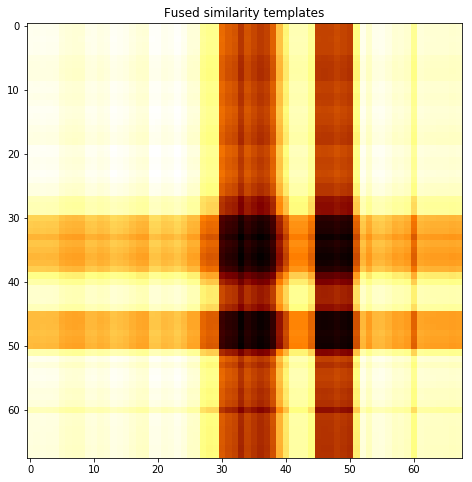

subject 35; gesture 1_0_2


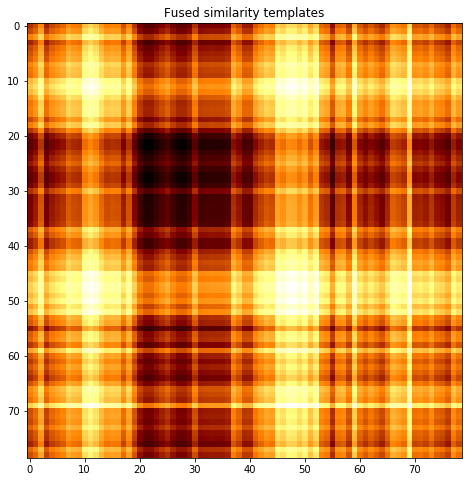

subject 22; gesture 1_1_2


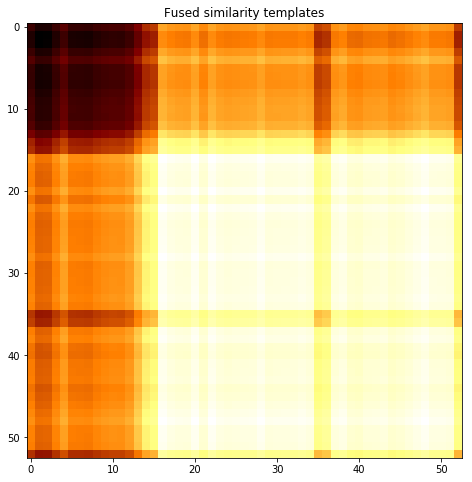

subject 22; gesture 1_1_1


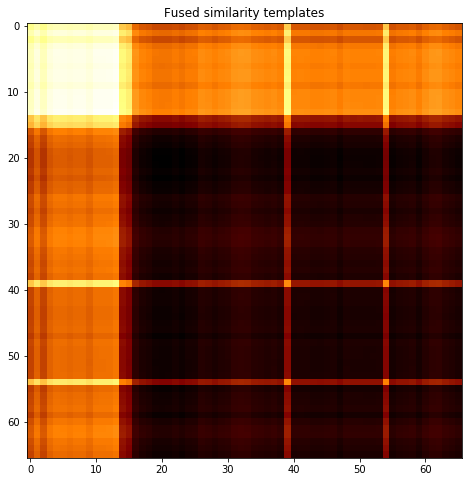

subject 22; gesture 1_0_1


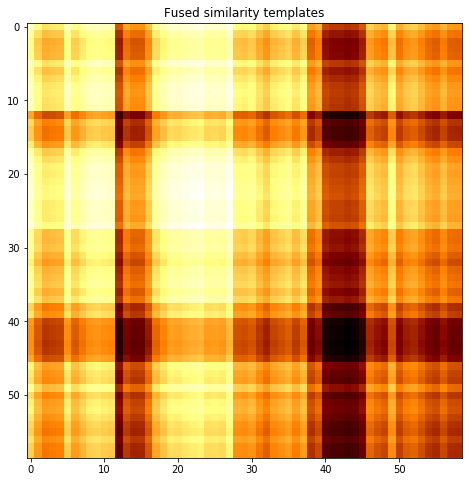

subject 22; gesture 1_0_2


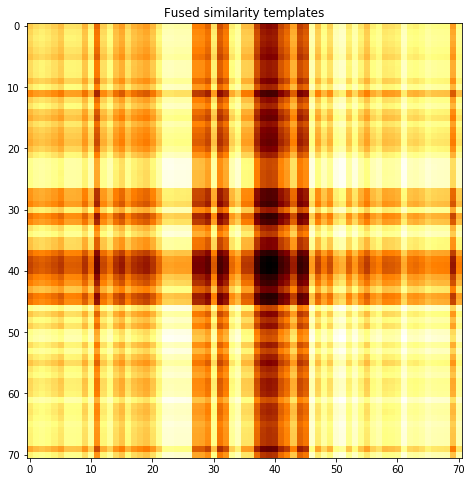

subject 34; gesture 1_1_2


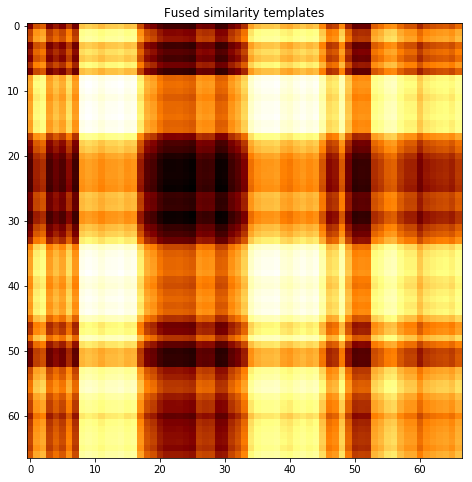

subject 34; gesture 1_1_1


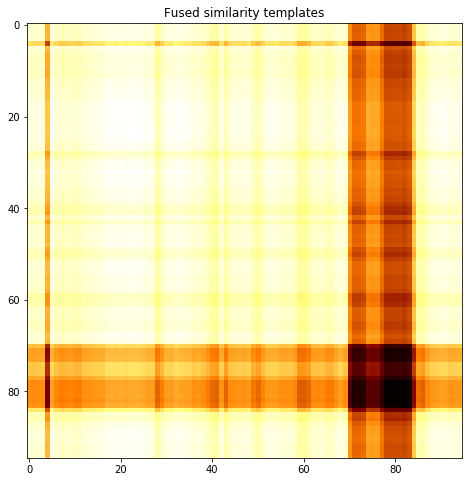

subject 34; gesture 1_0_1


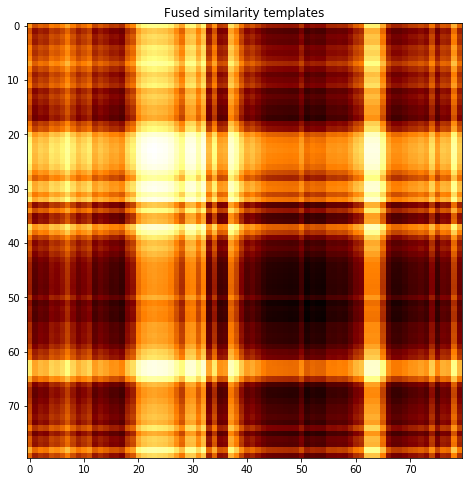

subject 34; gesture 1_0_2


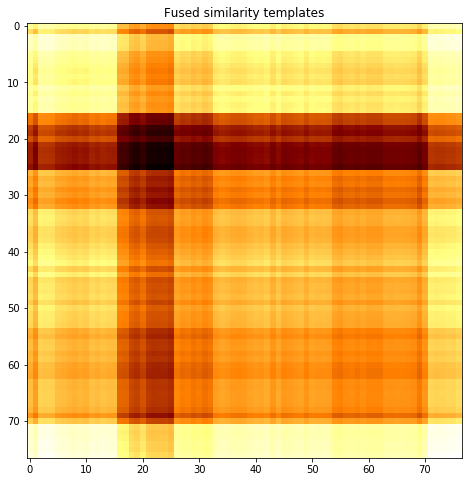

subject 10; gesture 1_1_2


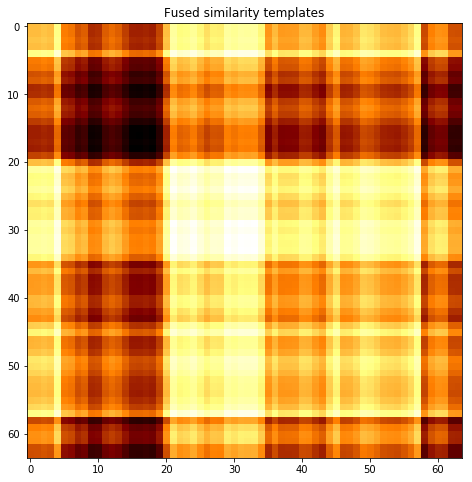

subject 10; gesture 1_1_1


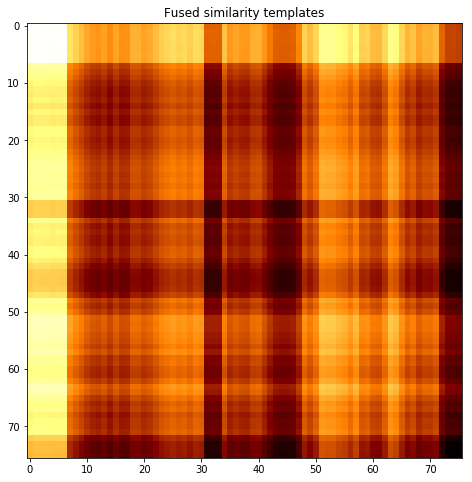

subject 10; gesture 1_0_1


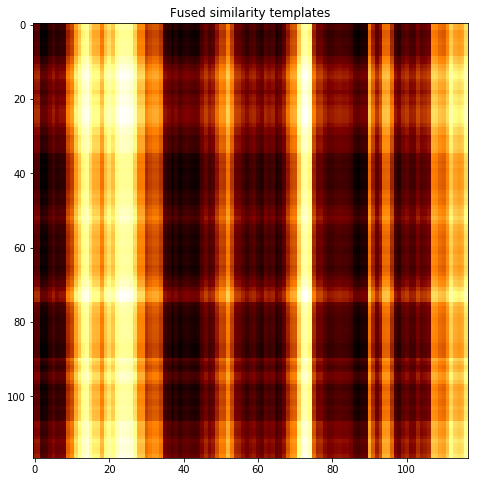

subject 10; gesture 1_0_2


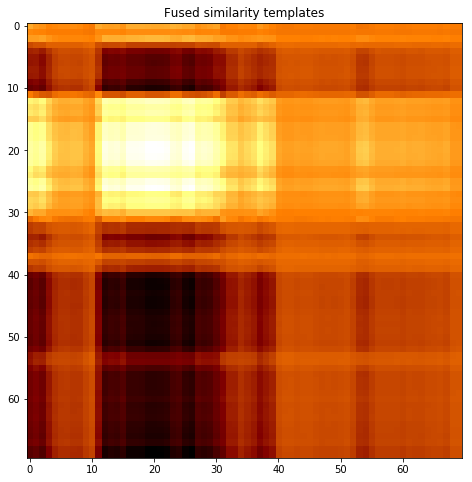

subject 02; gesture 1_1_2


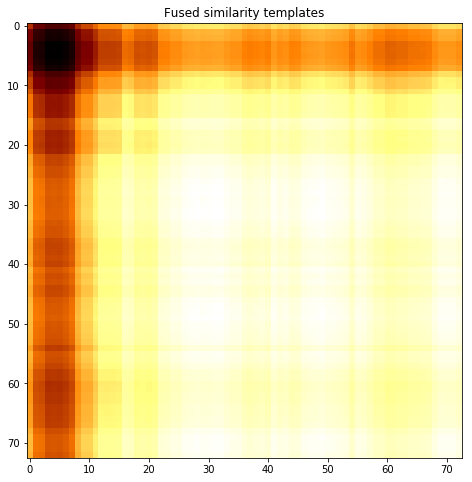

subject 02; gesture 1_1_1


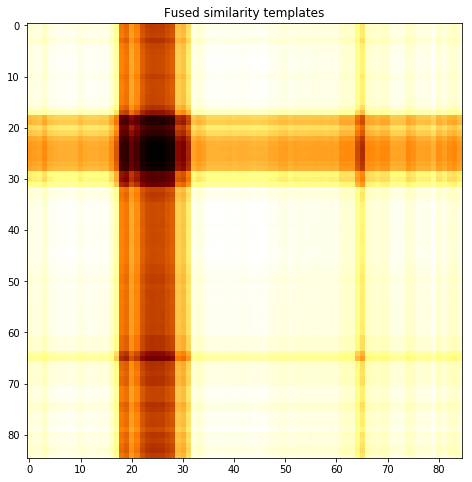

subject 02; gesture 1_0_1


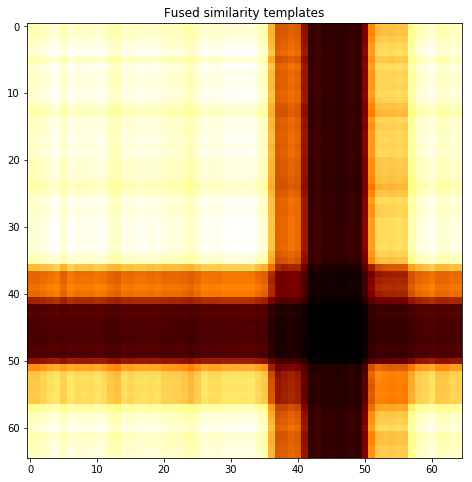

subject 02; gesture 1_0_2


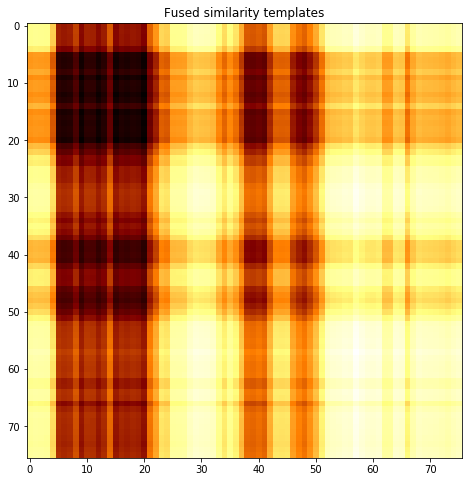

In [4]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

static w/ 25 iters

subject 05; gesture 1_0_1

subject 23; gesture 1_1_2

subject 25; gesture 1_0_1

subject 29; gesture 1_1_1

subject 12; gesture 1_1_2

subject 31; gesture 1_1_2

subject 24; gesture 1_1_1

Problem cases w/ 20 iters:

subject 21; gesture 1_0_1

subject 21; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.011630769180478773; sd 6.001719415984021e-14
subject 30; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


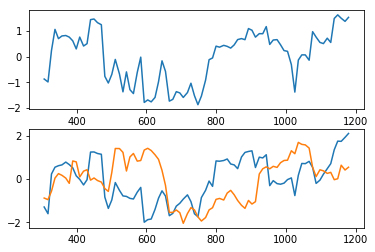

subject 30; gesture 1_1_1; avg 0.012082039642506232; sd 6.695775674296336e-07
subject 30; gesture 1_1_1; PoV: 0.9999999526548798


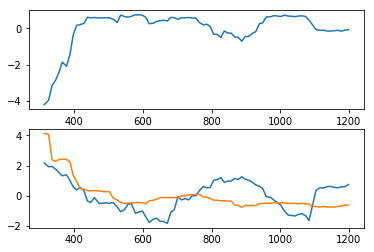

subject 30; gesture 1_0_1; avg 0.01076112648349864; sd 2.5387868484381815e-06
subject 30; gesture 1_0_1; PoV: 0.9999835302521566


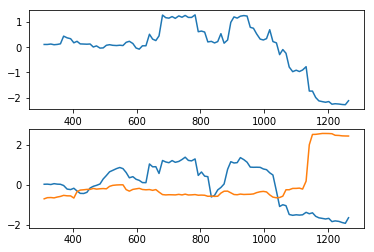

subject 30; gesture 1_0_2; avg 0.01337013336634466; sd 2.5013225632903853e-07
subject 30; gesture 1_0_2; PoV: 0.9999998977691632


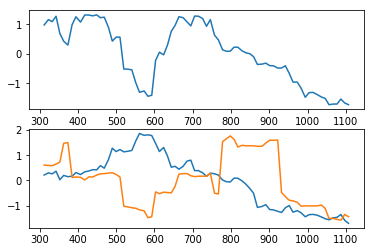

subject 06; gesture 1_1_2; avg 0.02754720639529582; sd 8.294973252054167e-09
subject 06; gesture 1_1_2; PoV: 0.9999999999984451


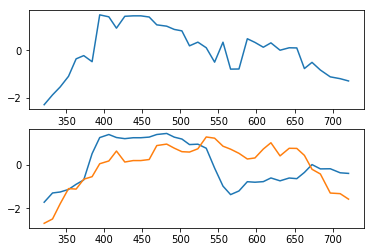

subject 06; gesture 1_1_1; avg 0.01363032459570171; sd 1.4435720119350707e-08
subject 06; gesture 1_1_1; PoV: 0.9999999995558514


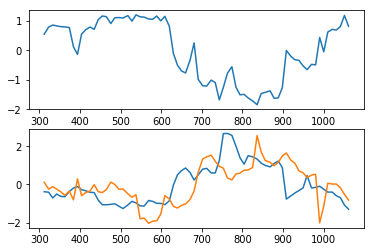

subject 06; gesture 1_0_1; avg 0.014965910426593634; sd 3.6826125128203717e-09
subject 06; gesture 1_0_1; PoV: 0.9999999998761433


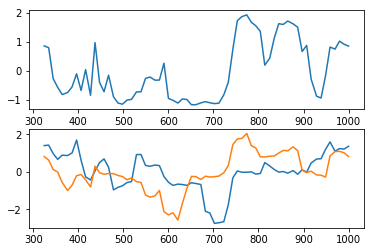

subject 06; gesture 1_0_2; avg 0.01856733281628475; sd 1.2372777374776792e-11
subject 06; gesture 1_0_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


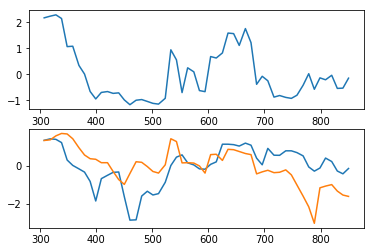

subject 09; gesture 1_1_2; avg 0.013697934738223639; sd 2.5641154917095082e-11
subject 09; gesture 1_1_2; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


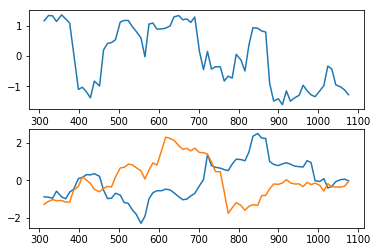

subject 09; gesture 1_1_1; avg 0.015190306313995578; sd 9.654386521108317e-11
subject 09; gesture 1_1_1; PoV: 0.9999999999997667


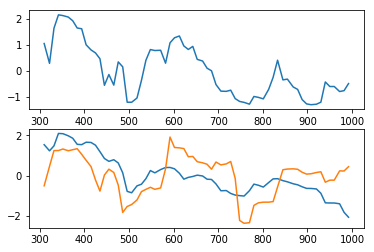

subject 09; gesture 1_0_1; avg 0.01202317992098341; sd 3.2777391583864216e-08
subject 09; gesture 1_0_1; PoV: 0.9999999997132383


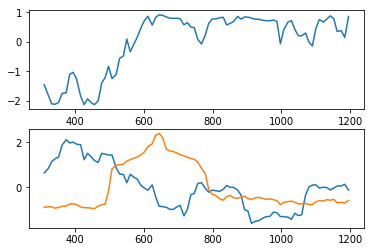

subject 09; gesture 1_0_2; avg 0.014454077402471463; sd 1.8177497899081806e-10
subject 09; gesture 1_0_2; PoV: 0.9999999999999875


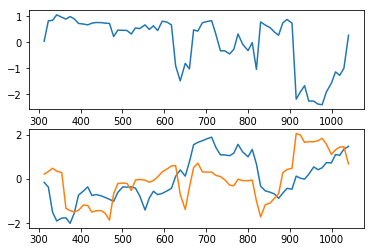

subject 03; gesture 1_1_2; avg 0.013220300490530591; sd 1.5174540860287132e-14
subject 03; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


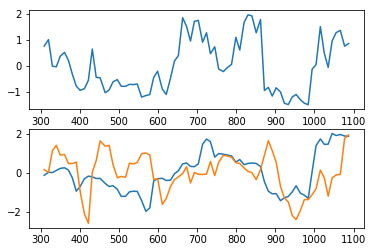

subject 03; gesture 1_1_1; avg 0.01854725769560415; sd 7.645982353090389e-12
subject 03; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


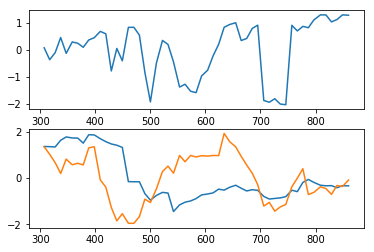

subject 03; gesture 1_0_1; avg 0.014111405335945524; sd 1.1113568357046331e-08
subject 03; gesture 1_0_1; PoV: 0.9999999321732735


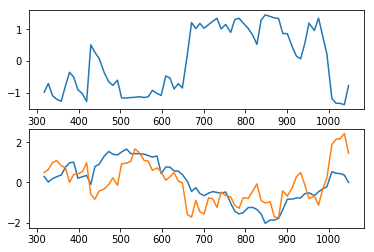

subject 03; gesture 1_0_2; avg 0.016284054715805348; sd 1.1917340839439613e-06
subject 03; gesture 1_0_2; PoV: 0.9999998852477645


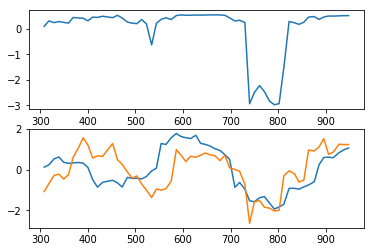

subject 05; gesture 1_1_2; avg 0.017961383405577472; sd 2.004888864059646e-05
subject 05; gesture 1_1_2; PoV: 0.9997826979304538


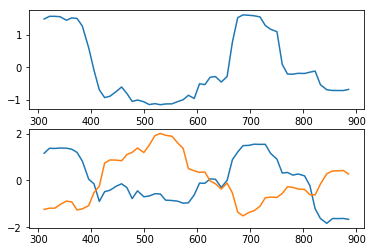

subject 05; gesture 1_1_1; avg 0.01808262716061986; sd 3.949531726691953e-10
subject 05; gesture 1_1_1; PoV: 0.9999999999999505


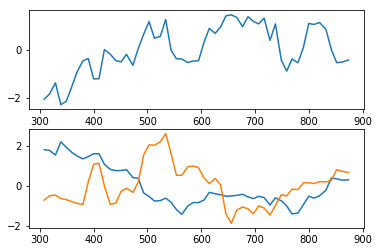

subject 05; gesture 1_0_1; avg 0.011448537334307528; sd 1.1721828687132327e-15
subject 05; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


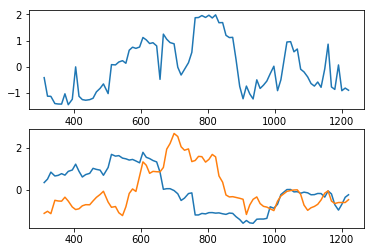

subject 05; gesture 1_0_2; avg 0.014747941522731076; sd 1.3191795087861932e-10
subject 05; gesture 1_0_2; PoV: 0.9999999999999851


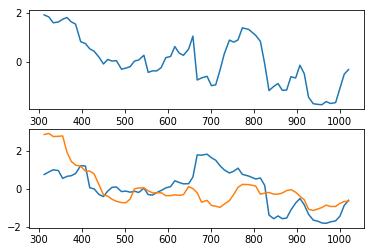

subject 21; gesture 1_1_2; avg 0.013756834934034482; sd 3.3621589166622455e-07
subject 21; gesture 1_1_2; PoV: 0.9999996512410813


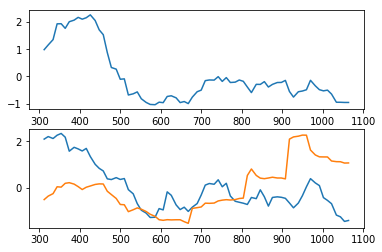

subject 21; gesture 1_1_1; avg 0.021464632473581408; sd 0.0029052338051234715
subject 21; gesture 1_1_1; PoV: 0.975531946761101


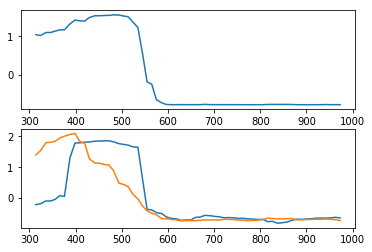

subject 21; gesture 1_0_1; avg 0.016923123674328047; sd 1.221082219140652e-07
subject 21; gesture 1_0_1; PoV: 0.9999999960976725


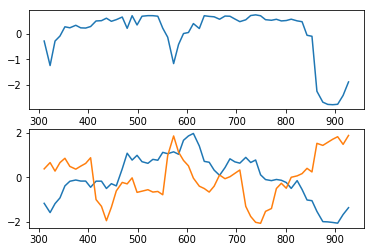

subject 21; gesture 1_0_2; avg 0.016965163623828394; sd 2.2865533399184317e-11
subject 21; gesture 1_0_2; PoV: 0.9999999999999967


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


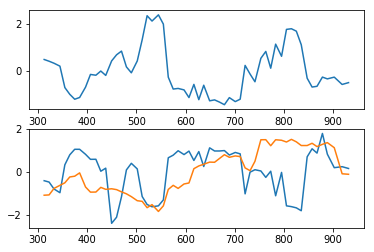

subject 17; gesture 1_1_2; avg 0.013384701875015132; sd 6.555037934750035e-08
subject 17; gesture 1_1_2; PoV: 0.9999986233377608


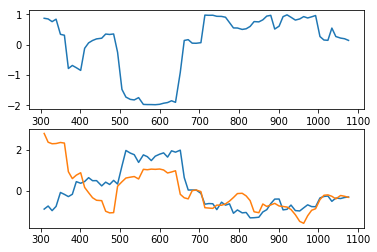

subject 17; gesture 1_1_1; avg 0.015984975763466188; sd 4.169361344579664e-11
subject 17; gesture 1_1_1; PoV: 0.9999999999999976


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


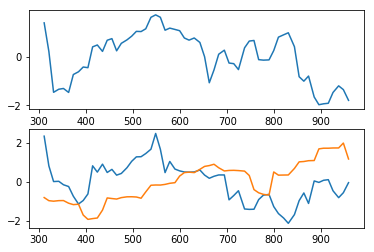

subject 17; gesture 1_0_1; avg 0.014136675214644462; sd 3.92336560405412e-08
subject 17; gesture 1_0_1; PoV: 0.9999999967919468


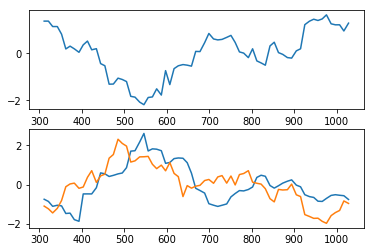

subject 17; gesture 1_0_2; avg 0.016477793738651957; sd 0.0005151678884273227
subject 17; gesture 1_0_2; PoV: 0.9724610402630444


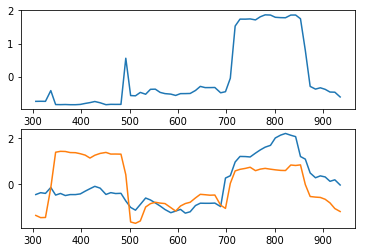

subject 01; gesture 1_1_2; avg 0.015568387096775872; sd 5.8199210270311185e-11
subject 01; gesture 1_1_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


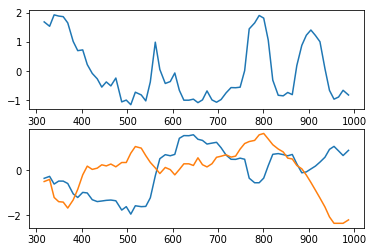

subject 01; gesture 1_1_1; avg 0.014590981823138132; sd 3.9977542922454314e-12
subject 01; gesture 1_1_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


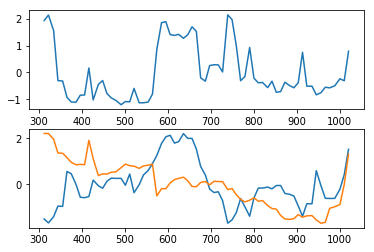

subject 01; gesture 1_0_1; avg 0.01100832115420308; sd 8.794619146000794e-09
subject 01; gesture 1_0_1; PoV: 0.9999999970832143


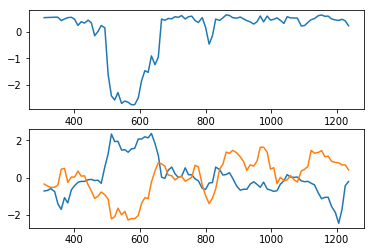

subject 01; gesture 1_0_2; avg 0.012262073267696053; sd 6.6128740567745755e-15
subject 01; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


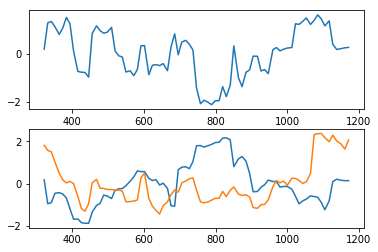

subject 16; gesture 1_1_2; avg 0.01972658281836191; sd 5.867317000476046e-07
subject 16; gesture 1_1_2; PoV: 0.9999999587026797


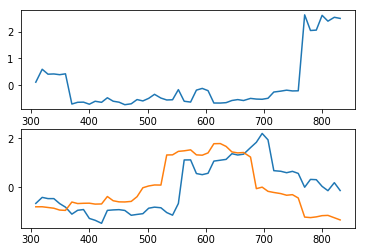

subject 16; gesture 1_1_1; avg 0.01361830462987083; sd 6.3056459599447015e-06
subject 16; gesture 1_1_1; PoV: 0.9996934517029612


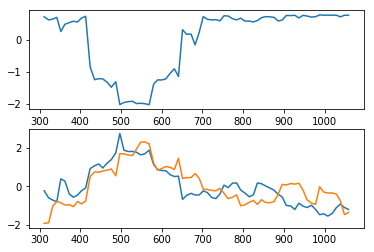

subject 16; gesture 1_0_1; avg 0.022314354841638264; sd 9.915171017224303e-05
subject 16; gesture 1_0_1; PoV: 0.999626301971769


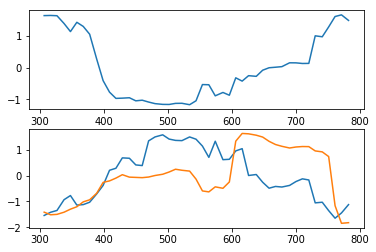

subject 16; gesture 1_0_2; avg 0.01849301951012757; sd 3.3385050675770397e-06
subject 16; gesture 1_0_2; PoV: 0.9999976408335655


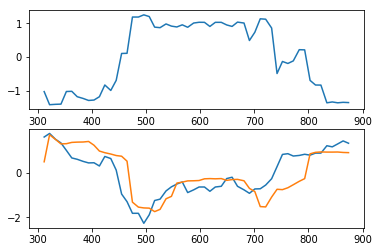

subject 26; gesture 1_1_2; avg 0.017893030714906583; sd 3.457669058240217e-12
subject 26; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


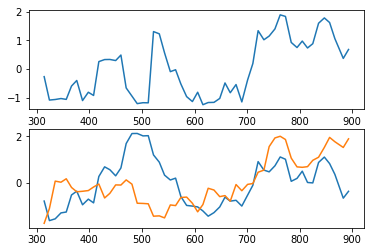

subject 26; gesture 1_1_1; avg 0.018907803014633656; sd 0.00019018296080671474
subject 26; gesture 1_1_1; PoV: 0.9989804557150203


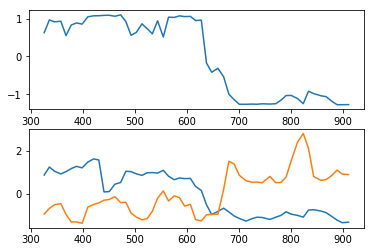

subject 26; gesture 1_0_1; avg 0.005038059932808943; sd 6.627315541848598e-17
subject 26; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


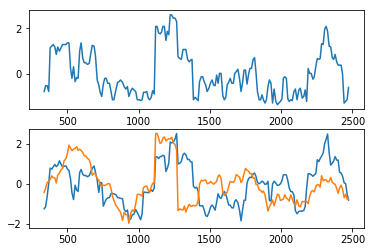

subject 26; gesture 1_0_2; avg 0.015356161615287496; sd 3.131825127714855e-07
subject 26; gesture 1_0_2; PoV: 0.9999999895305196


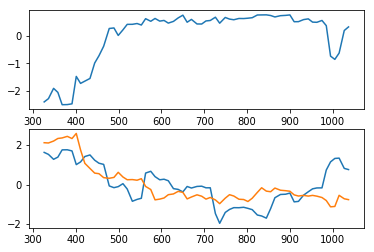

subject 32; gesture 1_1_2; avg 0.013018479324797756; sd 4.3790699591183514e-08
subject 32; gesture 1_1_2; PoV: 0.9999999991384303


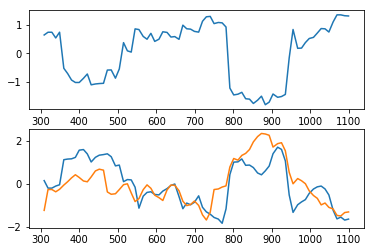

subject 32; gesture 1_1_1; avg 0.014800038959629978; sd 6.588790531859225e-10
subject 32; gesture 1_1_1; PoV: 0.999999999999301


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


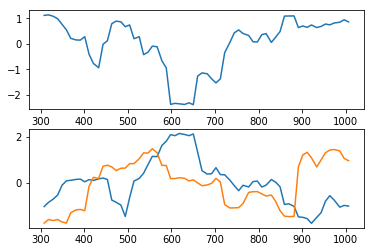

subject 32; gesture 1_0_1; avg 0.014385329112937066; sd 3.0355860139843384e-09
subject 32; gesture 1_0_1; PoV: 0.999999999870081


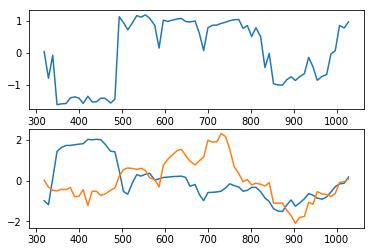

subject 32; gesture 1_0_2; avg 0.01747857750022961; sd 7.110892622959123e-05
subject 32; gesture 1_0_2; PoV: 0.9997243585373422


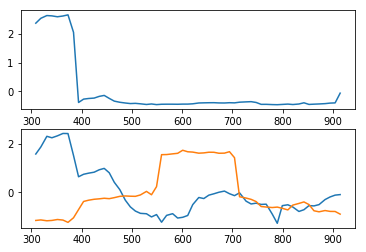

subject 04; gesture 1_1_2; avg 0.01371266365772036; sd 1.8325263585746185e-09
subject 04; gesture 1_1_2; PoV: 0.999999999974552


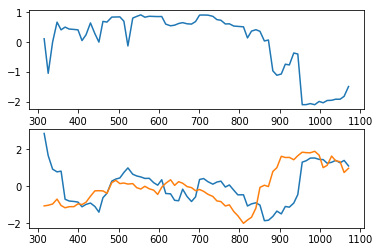

subject 04; gesture 1_1_1; avg 0.014552552102011474; sd 1.423599549217712e-09
subject 04; gesture 1_1_1; PoV: 0.9999999999817437


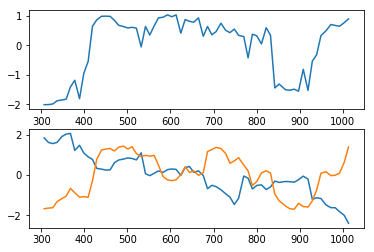

subject 04; gesture 1_0_1; avg 0.017239851251676718; sd 2.746977036729207e-10
subject 04; gesture 1_0_1; PoV: 0.9999999999999915


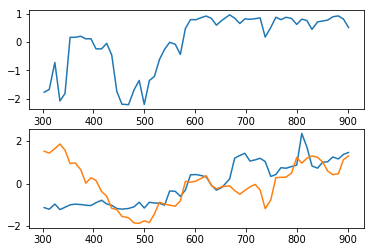

subject 04; gesture 1_0_2; avg 0.01593597973353727; sd 2.1436410149788063e-09
subject 04; gesture 1_0_2; PoV: 0.999999999997829


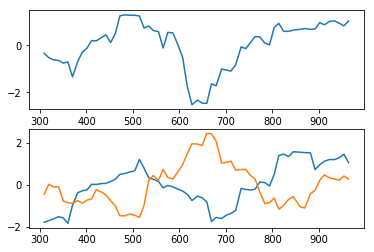

subject 08; gesture 1_1_2; avg 0.013601714694257905; sd 1.2624303162356866e-13
subject 08; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


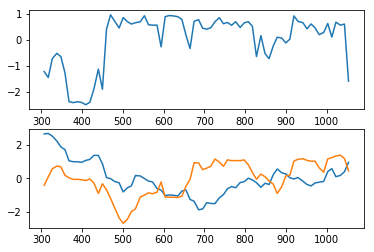

subject 08; gesture 1_1_1; avg 0.016353132088667115; sd 1.9773591242763988e-08
subject 08; gesture 1_1_1; PoV: 0.9999999653165699


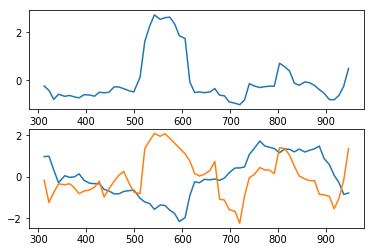

subject 08; gesture 1_0_1; avg 0.015047102056686459; sd 1.16706592572556e-11
subject 08; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


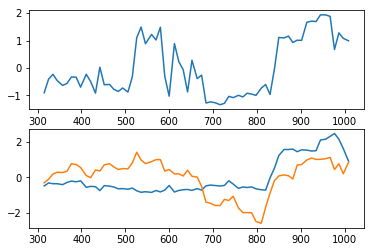

subject 08; gesture 1_0_2; avg 0.01632389095040185; sd 2.8506842229509328e-05
subject 08; gesture 1_0_2; PoV: 0.9995203413141488


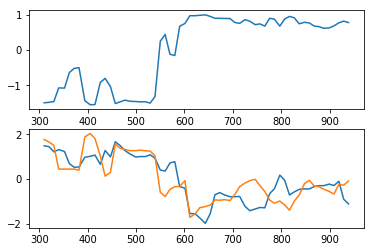

subject 27; gesture 1_1_2; avg 0.014379894979098825; sd 4.857200344040174e-08
subject 27; gesture 1_1_2; PoV: 0.9999999987712966


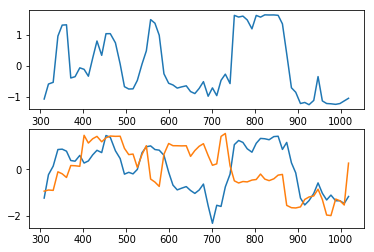

subject 27; gesture 1_1_1; avg 0.010452958593750868; sd 6.622882452106235e-13
subject 27; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


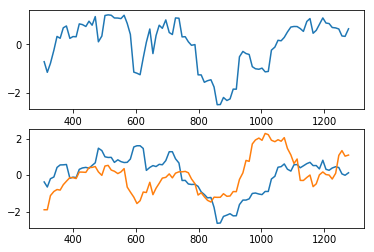

subject 27; gesture 1_0_1; avg 0.014566509258969473; sd 6.757355760473939e-09
subject 27; gesture 1_0_1; PoV: 0.9999999999739689


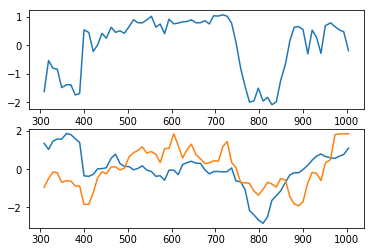

subject 27; gesture 1_0_2; avg 0.015490685009983842; sd 6.327023540234907e-12
subject 27; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


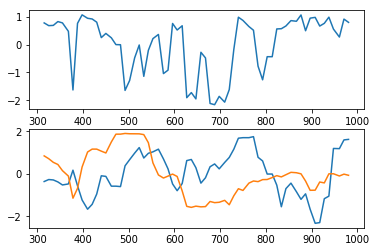

subject 14; gesture 1_1_2; avg 0.013355414799510846; sd 1.7826668334128382e-09
subject 14; gesture 1_1_2; PoV: 0.9999999999931874


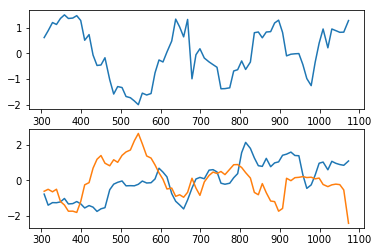

subject 14; gesture 1_1_1; avg 0.020305489030434366; sd 1.2599961798865932e-06
subject 14; gesture 1_1_1; PoV: 0.9999999380525578


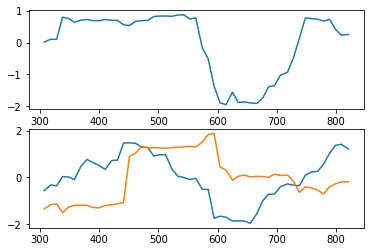

subject 14; gesture 1_0_1; avg 0.012722674565585824; sd 3.3026413893883905e-08
subject 14; gesture 1_0_1; PoV: 0.9999999991328001


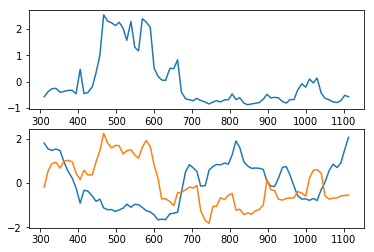

subject 14; gesture 1_0_2; avg 0.014225142451532075; sd 1.196343627612659e-08
subject 14; gesture 1_0_2; PoV: 0.9999999993726013


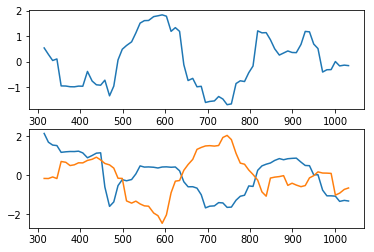

subject 23; gesture 1_1_2; avg 0.013070871303617023; sd 6.617010410731989e-16
subject 23; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


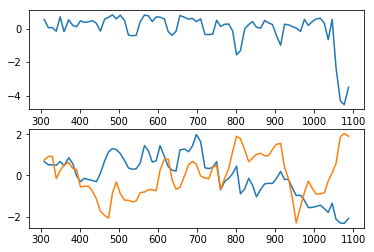

subject 23; gesture 1_1_1; avg 0.011901152672635534; sd 7.253625704960072e-11
subject 23; gesture 1_1_1; PoV: 0.9999999999999952


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


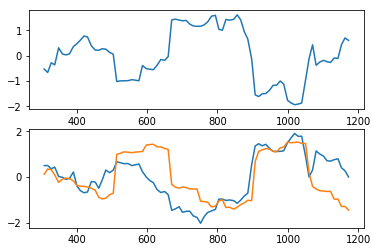

subject 23; gesture 1_0_1; avg 0.012029828345441742; sd 7.993776385026466e-12
subject 23; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


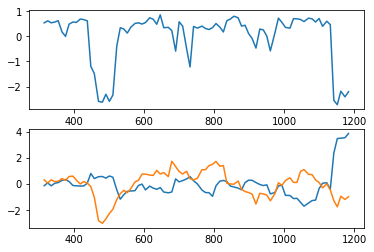

subject 23; gesture 1_0_2; avg 0.014504163047902167; sd 3.6295893562281096e-07
subject 23; gesture 1_0_2; PoV: 0.999999964216745


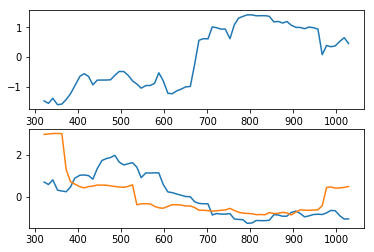

subject 25; gesture 1_1_2; avg 0.01596795293686707; sd 4.709469496868237e-08
subject 25; gesture 1_1_2; PoV: 0.9999999990442


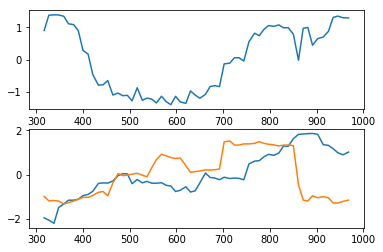

subject 25; gesture 1_1_1; avg 0.012068808507441723; sd 1.966262558120929e-08
subject 25; gesture 1_1_1; PoV: 0.9999999974141516


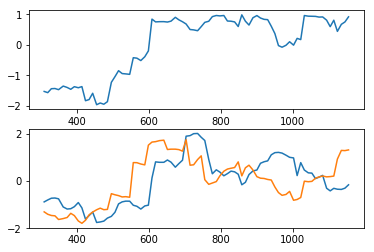

subject 25; gesture 1_0_1; avg 0.01471076928057664; sd 6.399380812681852e-16
subject 25; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


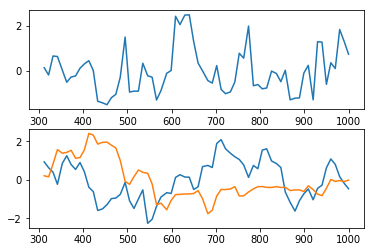

subject 25; gesture 1_0_2; avg 0.01628977635490578; sd 1.1087169932878462e-09
subject 25; gesture 1_0_2; PoV: 0.9999999999996129


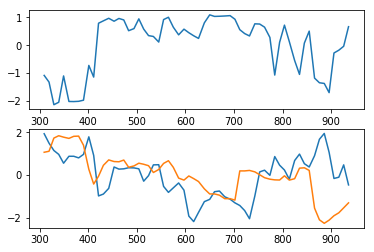

subject 18; gesture 1_1_2; avg 0.012602896466747561; sd 3.0161200855387055e-11
subject 18; gesture 1_1_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


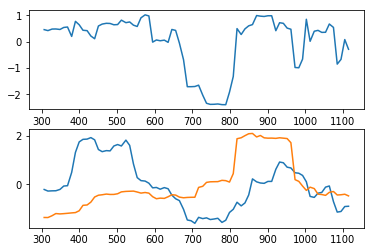

subject 18; gesture 1_1_1; avg 0.013174209154112118; sd 1.6300126146199132e-11
subject 18; gesture 1_1_1; PoV: 0.9999999999999982


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


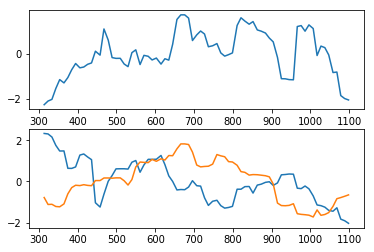

subject 18; gesture 1_0_1; avg 0.019372249716772885; sd 2.97738540606343e-07
subject 18; gesture 1_0_1; PoV: 0.9999998256143272


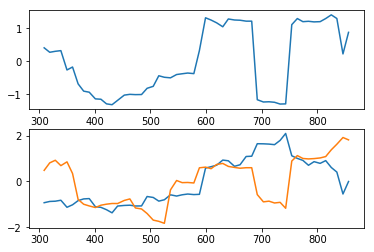

subject 18; gesture 1_0_2; avg 0.012675577201909025; sd 1.5474357109782442e-07
subject 18; gesture 1_0_2; PoV: 0.9999993854315073


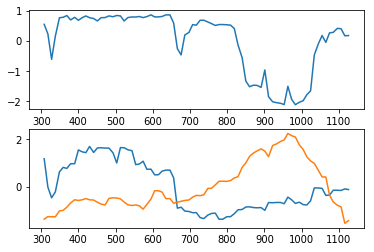

subject 29; gesture 1_1_2; avg 0.015495763400783078; sd 1.2976475309583212e-08
subject 29; gesture 1_1_2; PoV: 0.9999999999611024


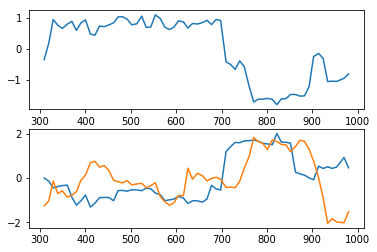

subject 29; gesture 1_1_1; avg 0.017863709575613434; sd 1.1682280033884708e-15
subject 29; gesture 1_1_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


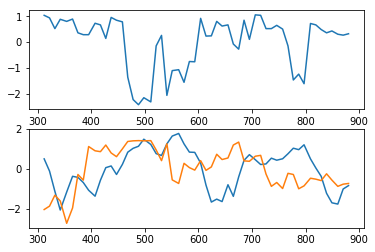

subject 29; gesture 1_0_1; avg 0.015450573462716461; sd 4.381332403047822e-11
subject 29; gesture 1_0_1; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


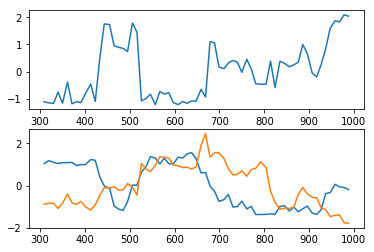

subject 29; gesture 1_0_2; avg 0.014813070536484889; sd 2.4376165963399076e-09
subject 29; gesture 1_0_2; PoV: 0.9999999999992194


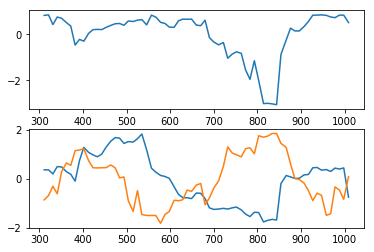

subject 15; gesture 1_1_2; avg 0.014276636511775975; sd 0.000682808073900377
subject 15; gesture 1_1_2; PoV: 0.9922400505947752


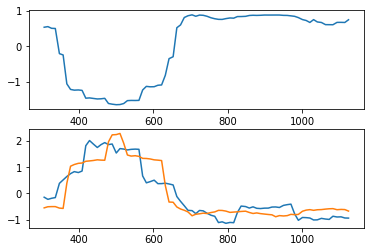

subject 15; gesture 1_1_1; avg 0.016019006291663782; sd 4.6178598234843265e-11
subject 15; gesture 1_1_1; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


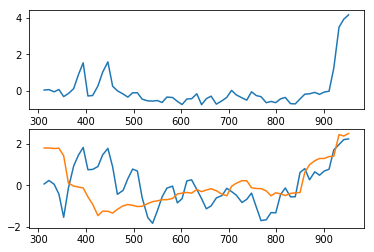

subject 15; gesture 1_0_1; avg 0.01705660191561956; sd 5.090282965050844e-07
subject 15; gesture 1_0_1; PoV: 0.999999905884426


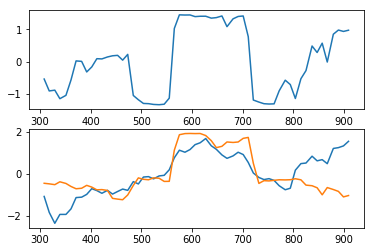

subject 15; gesture 1_0_2; avg 0.015550752738278897; sd 1.826195487275383e-05
subject 15; gesture 1_0_2; PoV: 0.99982398502481


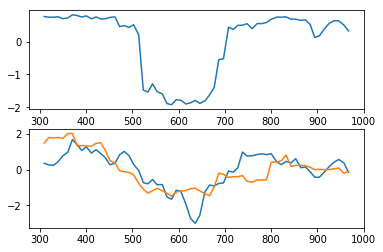

subject 28; gesture 1_1_2; avg 0.0206210953148054; sd 2.588093566626098e-07
subject 28; gesture 1_1_2; PoV: 0.999999991401271


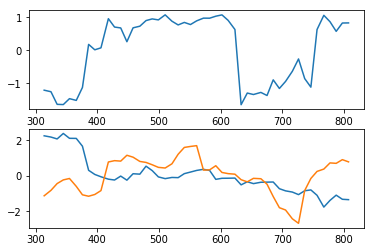

subject 28; gesture 1_1_1; avg 0.02476376614801276; sd 6.69827554333933e-07
subject 28; gesture 1_1_1; PoV: 0.99999995895167


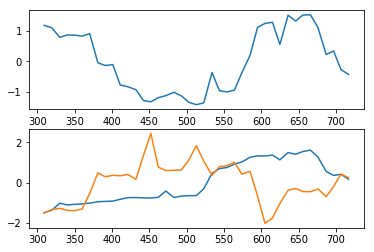

subject 28; gesture 1_0_1; avg 0.01880299137526439; sd 1.5902433822388608e-06
subject 28; gesture 1_0_1; PoV: 0.9999991629274576


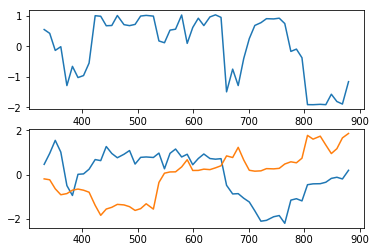

subject 28; gesture 1_0_2; avg 0.01669287546542034; sd 1.3772694658357981e-09
subject 28; gesture 1_0_2; PoV: 0.9999999999707053


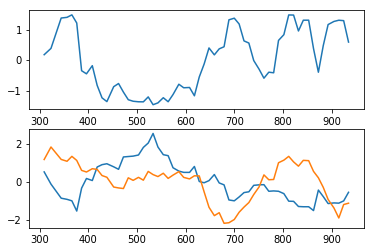

subject 12; gesture 1_1_2; avg 0.013503649335074907; sd 1.2098419141958595e-16
subject 12; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


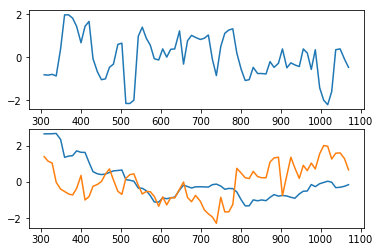

subject 12; gesture 1_1_1; avg 0.013955904650198124; sd 1.0526275210276115e-05
subject 12; gesture 1_1_1; PoV: 0.9999219545157867


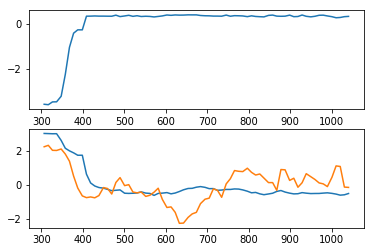

subject 12; gesture 1_0_1; avg 0.013511923927781241; sd 3.6025783847702464e-14
subject 12; gesture 1_0_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


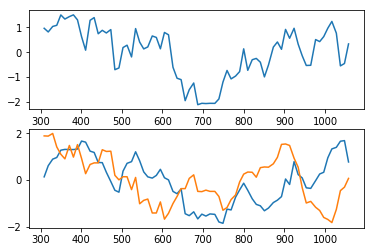

subject 12; gesture 1_0_2; avg 0.015715131800801214; sd 3.121662505551385e-10
subject 12; gesture 1_0_2; PoV: 0.9999999999988467


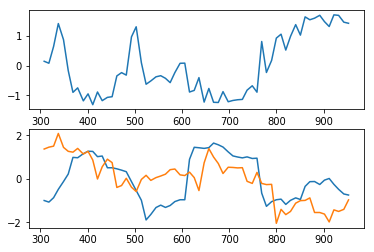

subject 19; gesture 1_1_2; avg 0.012903979336481642; sd 1.4585946910586769e-05
subject 19; gesture 1_1_2; PoV: 0.9997518599379446


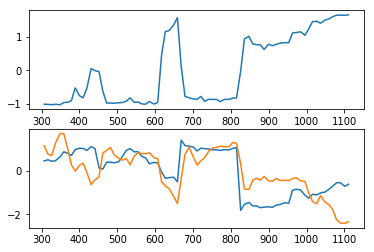

subject 19; gesture 1_1_1; avg 0.016501321259660945; sd 1.2505408195039718e-12
subject 19; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


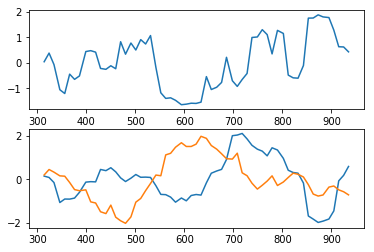

subject 19; gesture 1_0_1; avg 0.019466705675517622; sd 4.0880655951797407e-07
subject 19; gesture 1_0_1; PoV: 0.9999998989310279


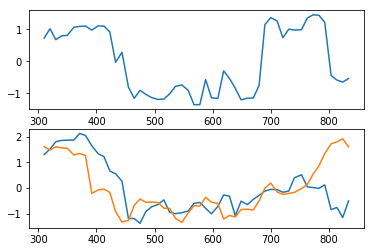

subject 19; gesture 1_0_2; avg 0.01567653222342086; sd 2.077839972143295e-06
subject 19; gesture 1_0_2; PoV: 0.9999945691171066


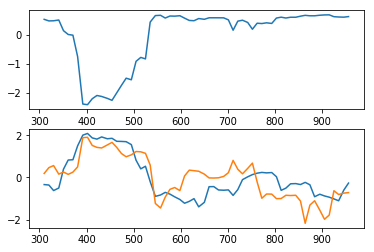

subject 07; gesture 1_1_2; avg 0.012061834474407363; sd 1.0214540511177963e-11
subject 07; gesture 1_1_2; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


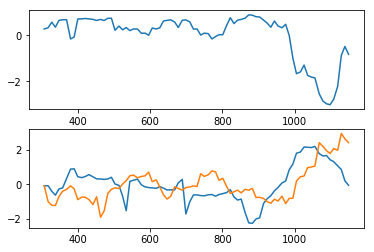

subject 07; gesture 1_1_1; avg 0.014543670728591078; sd 2.6776411225232665e-10
subject 07; gesture 1_1_1; PoV: 0.9999999999992589


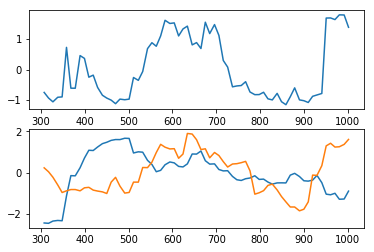

subject 07; gesture 1_0_1; avg 0.010933172759468684; sd 1.925210422819171e-14
subject 07; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


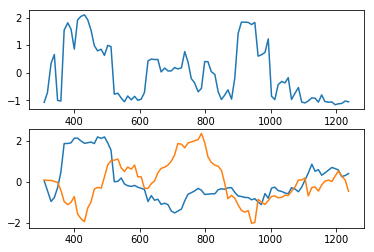

subject 07; gesture 1_0_2; avg 0.01360612120341437; sd 2.1746596844352855e-12
subject 07; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


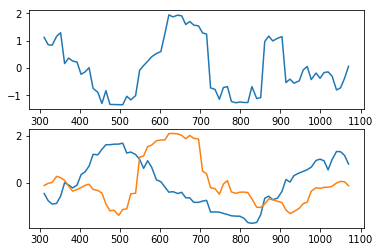

subject 20; gesture 1_1_2; avg 0.013226554785311156; sd 2.293806544603526e-09
subject 20; gesture 1_1_2; PoV: 0.9999999996458583


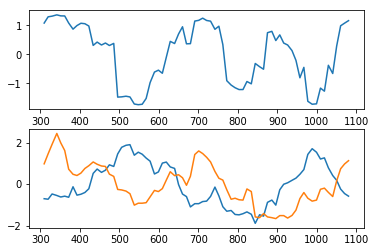

subject 20; gesture 1_1_1; avg 0.012445210460177242; sd 4.980354484051642e-08
subject 20; gesture 1_1_1; PoV: 0.9999999988147145


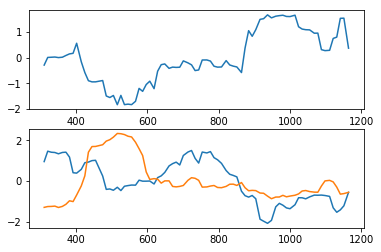

subject 20; gesture 1_0_1; avg 0.01265852010411465; sd 3.5476194630966944e-14
subject 20; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


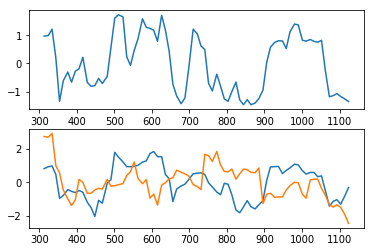

subject 20; gesture 1_0_2; avg 0.009796545700001229; sd 3.904280819929854e-08
subject 20; gesture 1_0_2; PoV: 0.9999999986492351


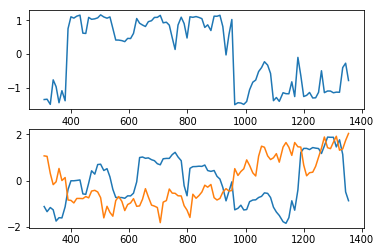

subject 31; gesture 1_1_2; avg 0.016161895412528316; sd 3.3854948451285795e-17
subject 31; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


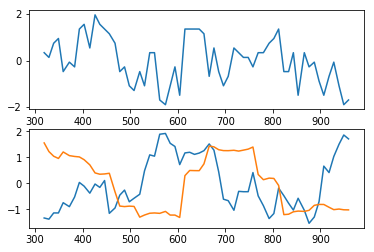

subject 31; gesture 1_1_1; avg 0.015744302568770074; sd 3.0538883513482816e-09
subject 31; gesture 1_1_1; PoV: 0.9999999999973846


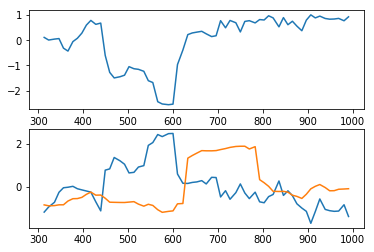

subject 31; gesture 1_0_1; avg 0.01056422250237903; sd 2.715875343680876e-12
subject 31; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


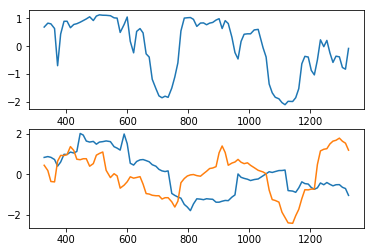

subject 31; gesture 1_0_2; avg 0.015281204767615351; sd 6.768206323714546e-09
subject 31; gesture 1_0_2; PoV: 0.9999999998961073


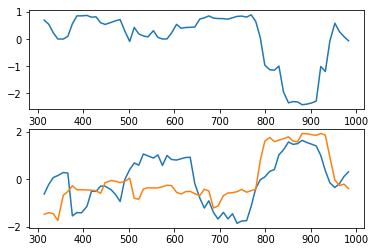

subject 13; gesture 1_1_2; avg 0.011143175692325103; sd 3.082545449956541e-14
subject 13; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


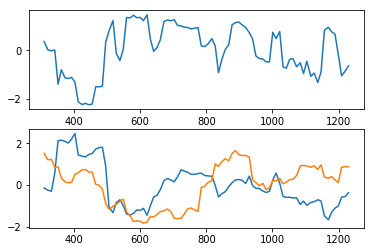

subject 13; gesture 1_1_1; avg 0.012707245591064066; sd 1.41260158541899e-10
subject 13; gesture 1_1_1; PoV: 0.999999999999885


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


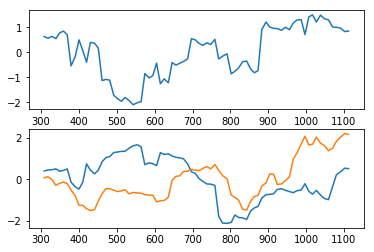

subject 13; gesture 1_0_1; avg 0.005561586875165214; sd 3.739807972830595e-17
subject 13; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


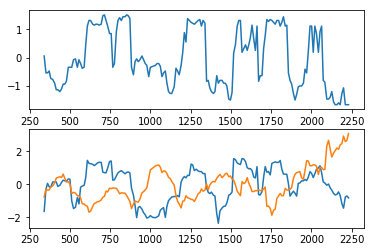

subject 13; gesture 1_0_2; avg 0.009750778198932272; sd 9.68469255054532e-10
subject 13; gesture 1_0_2; PoV: 0.9999999999981575


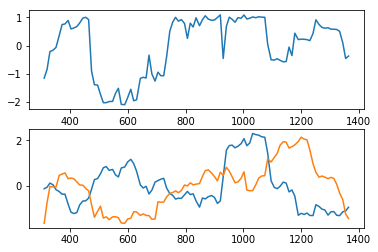

subject 36; gesture 1_1_2; avg 0.015174083359981936; sd 2.977351761326886e-13
subject 36; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


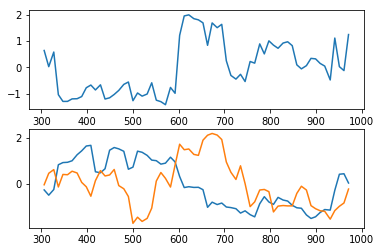

subject 36; gesture 1_1_1; avg 0.013626731199418906; sd 2.722064415678998e-09
subject 36; gesture 1_1_1; PoV: 0.999999999999447


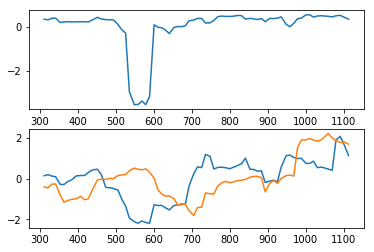

subject 36; gesture 1_0_1; avg 0.01694337040898922; sd 2.1362240177843574e-08
subject 36; gesture 1_0_1; PoV: 0.9999999996541096


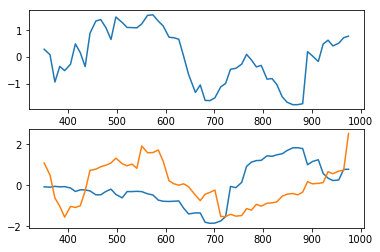

subject 36; gesture 1_0_2; avg 0.017535732645509176; sd 0.00045864203267032173
subject 36; gesture 1_0_2; PoV: 0.9920291699646808


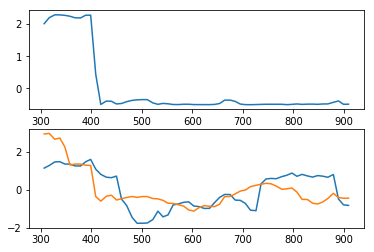

subject 24; gesture 1_1_2; avg 0.014251337509022317; sd 1.0776064191334049e-06
subject 24; gesture 1_1_2; PoV: 0.9999982696910443


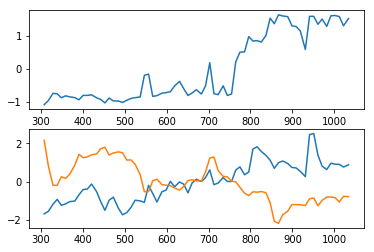

subject 24; gesture 1_1_1; avg 0.01593629404829087; sd 1.3815612946473716e-15
subject 24; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


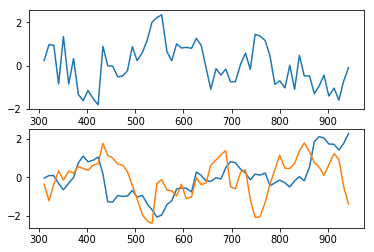

subject 24; gesture 1_0_1; avg 0.012939051901496298; sd 7.937496564908677e-11
subject 24; gesture 1_0_1; PoV: 0.9999999999999157


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


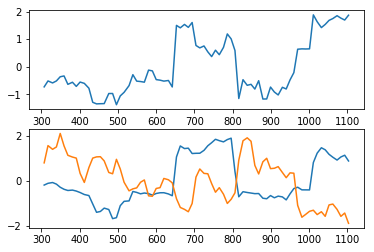

subject 24; gesture 1_0_2; avg 0.013838312313290363; sd 3.1371476297269916e-07
subject 24; gesture 1_0_2; PoV: 0.9999999623688414


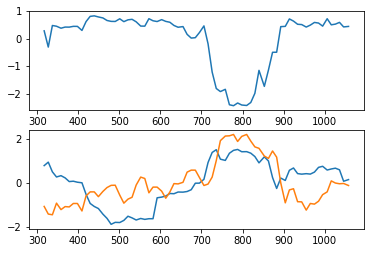

subject 33; gesture 1_1_2; avg 0.013584038154483098; sd 3.022391710656843e-09
subject 33; gesture 1_1_2; PoV: 0.9999999999757246


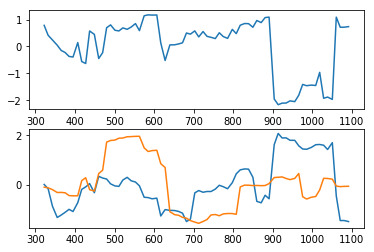

subject 33; gesture 1_1_1; avg 0.013302927621617522; sd 1.1777216088836056e-07
subject 33; gesture 1_1_1; PoV: 0.9999999775898056


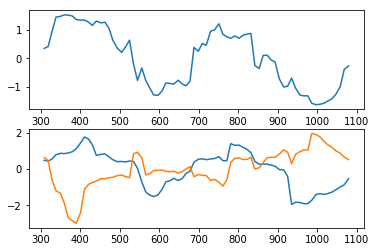

subject 33; gesture 1_0_1; avg 0.014498371893206768; sd 1.0161381098435235e-10
subject 33; gesture 1_0_1; PoV: 0.9999999999999932


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


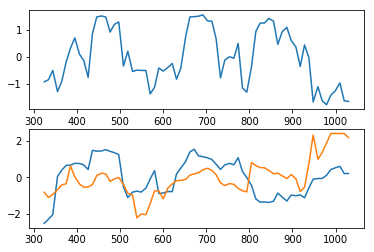

subject 33; gesture 1_0_2; avg 0.013526566142998778; sd 5.17642331149235e-09
subject 33; gesture 1_0_2; PoV: 0.9999999999942203


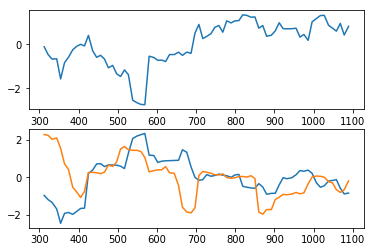

subject 11; gesture 1_1_2; avg 0.012697160186804566; sd 2.3113397156989803e-15
subject 11; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


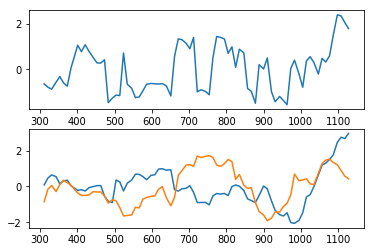

subject 11; gesture 1_1_1; avg 0.011397444223074276; sd 2.563583341459595e-13
subject 11; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


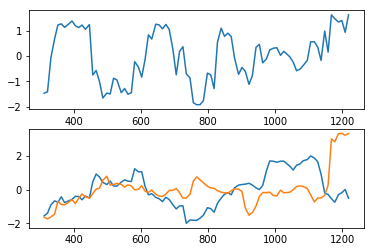

subject 11; gesture 1_0_1; avg 0.011950138368474198; sd 1.4495080218241003e-15
subject 11; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


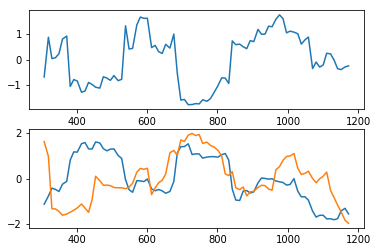

subject 11; gesture 1_0_2; avg 0.014316574467299439; sd 1.8127183489256334e-10
subject 11; gesture 1_0_2; PoV: 0.9999999999999424


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


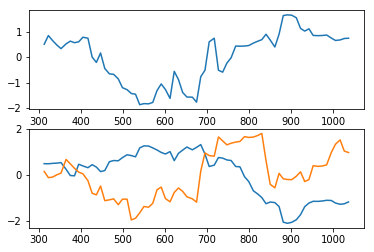

subject 35; gesture 1_1_2; avg 0.01371802587058031; sd 3.0986253299170414e-10
subject 35; gesture 1_1_2; PoV: 0.9999999999999445


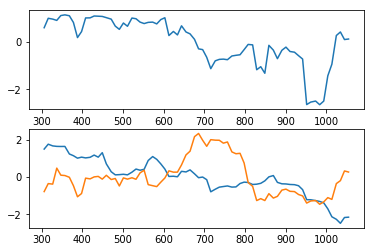

subject 35; gesture 1_1_1; avg 0.01783805319922103; sd 3.7201245129974386e-06
subject 35; gesture 1_1_1; PoV: 0.9999956527767346


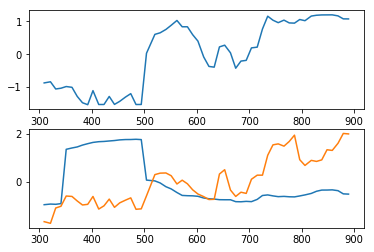

subject 35; gesture 1_0_1; avg 0.01494240998916117; sd 1.0859590092284923e-06
subject 35; gesture 1_0_1; PoV: 0.9999998354589317


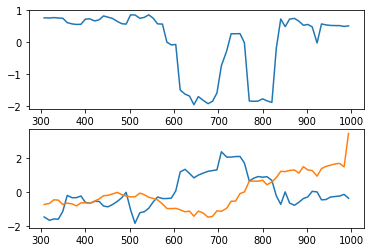

subject 35; gesture 1_0_2; avg 0.012704863392953722; sd 5.1965689931116853e-14
subject 35; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


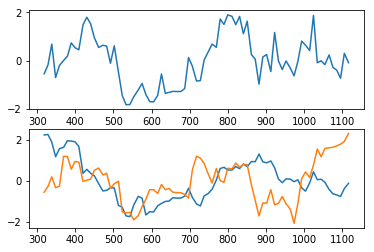

subject 22; gesture 1_1_2; avg 0.01955392314049748; sd 1.010959162429088e-06
subject 22; gesture 1_1_2; PoV: 0.9999999395826593


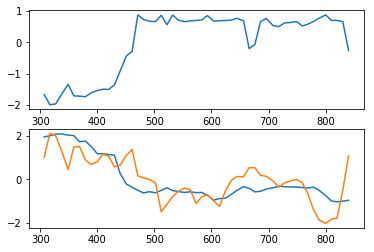

subject 22; gesture 1_1_1; avg 0.015331649796871296; sd 3.773255242715447e-06
subject 22; gesture 1_1_1; PoV: 0.9999932955372933


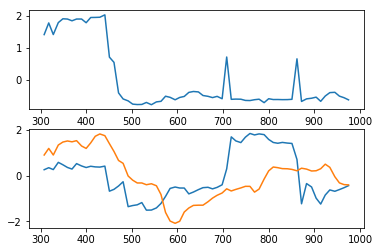

subject 22; gesture 1_0_1; avg 0.01710505790676077; sd 1.3571309059772692e-11
subject 22; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


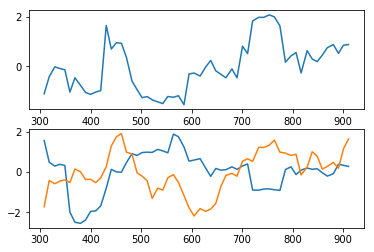

subject 22; gesture 1_0_2; avg 0.014138224600364697; sd 2.5978905125303384e-14
subject 22; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


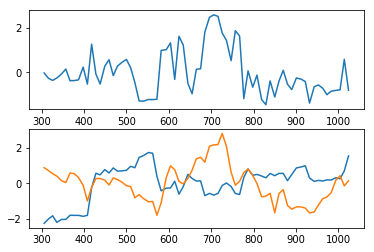

subject 34; gesture 1_1_2; avg 0.015160480006968855; sd 1.2288822921551238e-09
subject 34; gesture 1_1_2; PoV: 0.9999999999995326


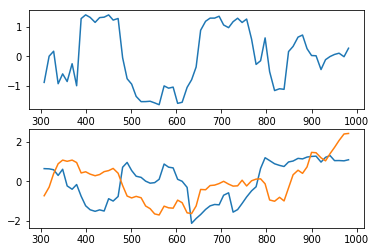

subject 34; gesture 1_1_1; avg 0.010624001606616888; sd 4.004773324060861e-09
subject 34; gesture 1_1_1; PoV: 0.9999999999914669


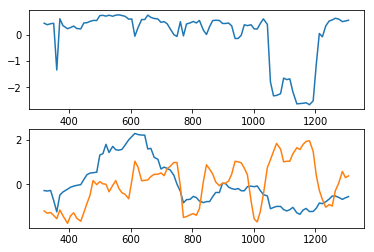

subject 34; gesture 1_0_1; avg 0.012574969788822077; sd 2.60972508628002e-11
subject 34; gesture 1_0_1; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


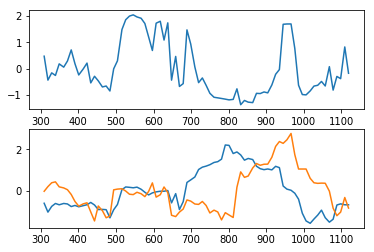

subject 34; gesture 1_0_2; avg 0.012995969312355115; sd 6.345521050640631e-11
subject 34; gesture 1_0_2; PoV: 0.9999999999999682


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


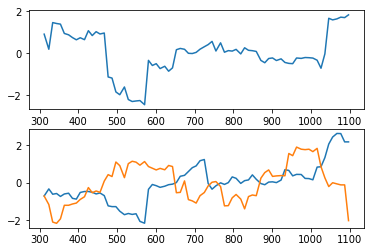

subject 10; gesture 1_1_2; avg 0.01565631727114524; sd 6.812680025580103e-11
subject 10; gesture 1_1_2; PoV: 0.9999999999999878


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


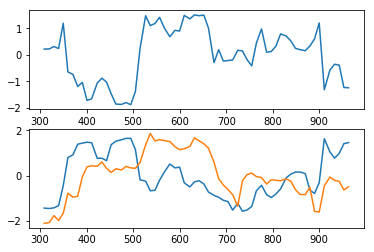

subject 10; gesture 1_1_1; avg 0.01331966020562559; sd 3.6888304026240885e-10
subject 10; gesture 1_1_1; PoV: 0.9999999999998925


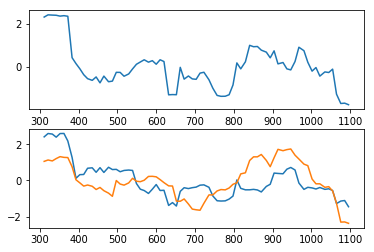

subject 10; gesture 1_0_1; avg 0.008562479797686541; sd 4.6568148480377674e-12
subject 10; gesture 1_0_1; PoV: 0.9999999999998916


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


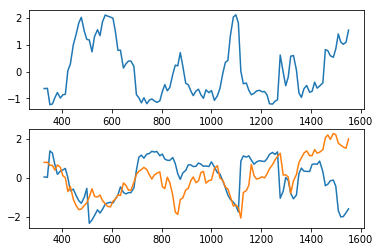

subject 10; gesture 1_0_2; avg 0.014388638888826268; sd 1.4412770282046916e-07
subject 10; gesture 1_0_2; PoV: 0.9999943888882825


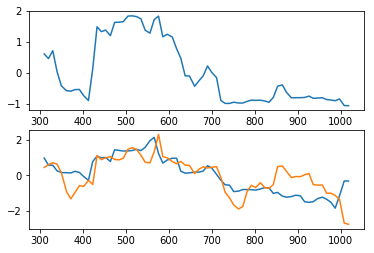

subject 02; gesture 1_1_2; avg 0.013759409036260448; sd 1.809362067545476e-07
subject 02; gesture 1_1_2; PoV: 0.9999999808145833


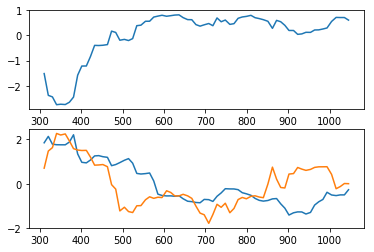

subject 02; gesture 1_1_1; avg 0.011929369821730455; sd 1.7065340852472497e-09
subject 02; gesture 1_1_1; PoV: 0.9999999999965259


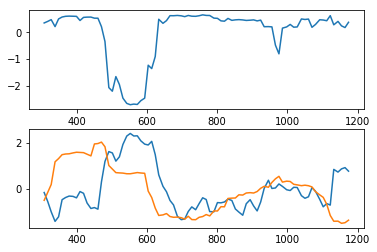

subject 02; gesture 1_0_1; avg 0.01576004161899211; sd 6.033006662773501e-06
subject 02; gesture 1_0_1; PoV: 0.9998983163172357


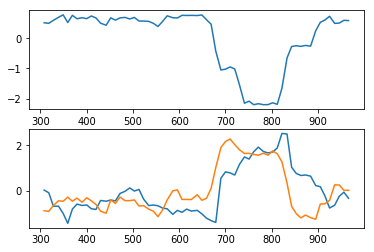

subject 02; gesture 1_0_2; avg 0.01328915391182821; sd 3.0528658977672604e-09
subject 02; gesture 1_0_2; PoV: 0.9999999999552853


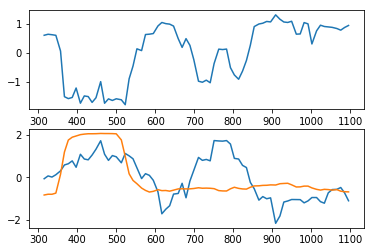

In [5]:
decomp_g1_ant = {}

for s, gdict in g1_dict_antag.items():
    decomp_g1_ant[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26

gesture 1_1_2

gesture 1_0_1

32

gesture 1_1_1

08

gesture 1_1_2

gesture 1_0_1

27

gesture 1_1_1

gesture 1_0_2

23

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25

gesture 1_0_1


18

gesture 1_1_2

gesture 1_1_1

29

gesture 1_1_1

gesture 1_0_1

15

gesture 1_1_1

12

gesture 1_1_2

gesture 1_0_1

19

gesture 1_1_1

07

gesture 1_1_2

gesture 1_0_1

gesture 1_0_2

20

gesture 1_0_1

31

gesture 1_1_2

gesture 1_0_1

13

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

36

gesture 1_1_2

24

gesture 1_1_1

gesture 1_0_1

33

gesture 1_0_1

11

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

gesture 1_0_2

35

gesture 1_0_2

22

gesture 1_0_1

gesture 1_0_2

34

gesture 1_0_1

gesture 1_0_2

10

gesture 1_1_2

gesture 1_0_1

---

In [8]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_ant.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_ant.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [9]:
np.average([d for d in compares["30"].values()])

8.357210389316508